In [6]:
# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from matplotlib import pyplot
import requests
import json
import random

from bs4 import BeautifulSoup


In [9]:
#deck to vector conversion updated for the new json dictionnary
#New: Testing

file = open("data.json", "r")

cards = json.load(file)

#removes hero classes from json
def remove_impurities(cards):
    i = 0
    j = 0
    fixed = 0
    to_del = []
    for card in cards:
        if 'cost' in card:
            i+=1
        else:
            to_del.append(card)
            print('Removed:', card['name'])
            j +=1
        if card['playerClass'] == 'Neutral' and 'classes' in card:
            card['playerClass'] = card['classes'][0]
            fixed += 1
            print('Fixed playerClass of ', card['name'], ' from Neutral to ', card['classes'][0])
    for elem in to_del:
        cards.remove(elem)
    print('Number of impurities removed: ', j, '/', i+j)
    print('Number of card impurities fixed: ', fixed)
    return cards

def sortby_alphabetical_cost(cards):
    sorted_list = sorted(cards, key=lambda i: (i['cost'],i['name']))
    return reset_index(sorted_list)

def reset_index(cards):
    i=0
    for card in cards:
        card['id'] = i
        i+=1
    return cards

cards = remove_impurities(cards)
cards = sortby_alphabetical_cost(cards)

deck_vector = [32,64,98,1000,1250,1,2,4,5,70,97,12,67,98,33,33,43,54,76,27,65,43,78,32,78,96,12,10,32,6]
deck_vector_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

def deck_to_vector(deck_cards):
    vect = []
    for elem in deck_cards:
        #print(elem['id'])
        vect.append(elem['id'])
        #print(elem)
        #print(elem in cards)
        #vect.append(cards[elem['id']]['id'])
    return vect
    
def vector_to_deck(deck_vector,cards=cards):
    deck = []
    for elem in deck_vector:
        deck.append(cards[elem])
    return deck


deck = vector_to_deck(deck_vector)
deck_vector = deck_to_vector(deck)

print(deck[0])
#print(deck_vector)
#res = vector_to_deck(deck_vector_2)
#print(res)
#print(deck_to_vector(res))



Fixed playerClass of  Guidance  from Neutral to  Druid
Fixed playerClass of  Nitroboost Poison  from Neutral to  Rogue
Fixed playerClass of  Resizing Pouch  from Neutral to  Druid
Fixed playerClass of  Felfire Deadeye  from Neutral to  Hunter
Fixed playerClass of  Imprisoned Phoenix  from Neutral to  Mage
Fixed playerClass of  Hysteria  from Neutral to  Priest
Fixed playerClass of  Luckysoul Hoarder  from Neutral to  Warlock
Fixed playerClass of  Barricade  from Neutral to  Paladin
Fixed playerClass of  Rally!  from Neutral to  Paladin
Fixed playerClass of  Keywarden Ivory  from Neutral to  Mage
Removed: Anduin Wrynn
Removed: Garrosh Hellscream
Removed: Gul'dan
Removed: Illidan Stormrage
Removed: Jaina Proudmoore
Removed: Malfurion Stormrage
Removed: Rexxar
Removed: Thrall
Removed: Uther Lightbringer
Removed: Valeera Sanguinar
Number of impurities removed:  10 / 1299
Number of card impurities fixed:  10
{'cardId': 'EX1_277', 'dbfId': '564', 'name': 'Arcane Missiles', 'cardSet': 'Basic'

In [10]:
#file1 = open('cards-standard.txt', 'r') 
#Lines = file1.readlines() 
#maximum = len(Lines)
#cards_key = {}
#cards_value = {}
#i=1
#for line in Lines:
 #   cards_value[i] = line.rstrip("\n")
  #  cards_key[line.rstrip("\n")] = i
   # i += 1

#print(cards_key["Arcane Breath"])
#print(cards_value[32])
#print(len(Lines))

In [11]:
#deck_vector = [32,64,98,1000,1250,1,2,4,5,70,97,12,67,98,33,33,43,54,76,27,65,43,78,32,78,96,12,10,32,6]
#print(len(deck_vector))

#no need to filter based of card class or legendaries etc.. because this is just for the conversion after the deck has been built. The actual filtering should be either done by the AI or previously done in the deckbuilding CSV

#def deck_to_vector_csv(deck):
 #   deck_vector = []
  #  for elem in deck:
        #remove any potential white spaces from strings
        #if type(deck) is not list:
   #     elem = elem.lstrip()
    #    elem = elem.rstrip()
     #   deck_vector.append(cards_key[elem])
    #return deck_vector

#def vector_to_deck_csv(deck_vector):
 #   deck = []
  #  for elem in deck_vector:
   #     deck.append(cards_value[elem])
    #return deck

#deck = vector_to_deck(deck_vector)
#print(deck)

#new_deck_vector = deck_to_vector(deck)
#print(new_deck_vector)


In [12]:
import numpy as np
import pandas as pd

def concatenate_deck_class(decks, classes):
    concatenated_result = []
    for i in range(len(decks)):
        concatenated_result.append([decks[i],classes[i]])
    return concatenated_result

def read_vector_decks(file):
    df = pd.read_csv(file)
    cards_from_csv = df['cards']
    converted_decks = []
    for cards in cards_from_csv:
        if len(deck) == 30: #len(cards)
            deck_to_convert = []
            cards = cards.strip("[]")
            cards = cards.split(", ")
            for card in cards:
                if card == '':
                    continue
                deck_to_convert.append(int(card)-1)
            converted_decks.append(vector_to_deck(deck_to_convert)) #np.asarray
            class_from_csv = df['class']
            final = concatenate_deck_class(converted_decks, class_from_csv)
    return final
            

deck_list = read_vector_decks("collected_decks_vectored_Warrior.csv")

def read_json_decks(file):
    file = open(file, "r")
    deck_list = json.load(file)
    cleaned_deck_list = []
    for deck in deck_list:
        if len(deck) == 30:
            cleaned_deck_list.append(deck)
    return cleaned_deck_list

deck_list = read_json_decks('data_Warrior.json')


deck_list[0]

[{'cardId': 'BT_121',
  'dbfId': '56508',
  'name': "Imprisoned Gan'arg",
  'cardSet': 'Ashes of Outland',
  'type': 'Minion',
  'rarity': 'Common',
  'cost': 1,
  'attack': 2,
  'health': 2,
  'text': '<b>Dormant</b> for 2 turns.\\nWhen this awakens,\\nequip a 3/2 Axe.',
  'flavor': 'Factory Direct Fiery War Axe. Please allow two turns for delivery.',
  'artist': 'Ivan Fomin',
  'collectible': True,
  'race': 'Demon',
  'playerClass': 'Warrior',
  'img': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/b5d2910686d797f3e762ccb4159599e227d594a9d7e5dad864fee508fb259bb9.png',
  'locale': 'enUS',
  'id': 332},
 {'cardId': 'BT_121',
  'dbfId': '56508',
  'name': "Imprisoned Gan'arg",
  'cardSet': 'Ashes of Outland',
  'type': 'Minion',
  'rarity': 'Common',
  'cost': 1,
  'attack': 2,
  'health': 2,
  'text': '<b>Dormant</b> for 2 turns.\\nWhen this awakens,\\nequip a 3/2 Axe.',
  'flavor': 'Factory Direct Fiery War Axe. Please allow two turns for delivery.',
  'artist': 'Ivan Fomin',
  '

In [13]:
#this became redundant after I scraped class decks separately

classes = ['Warrior', 'Mage', 'Hunter', 'Priest', 'Druid', 'Rogue', 'Shaman', 'Warlock', 'Paladin', 'Demon Hunter']

class_dictionary = {}

def filter_class(class_):
    filtered_decks = []
    for deck in deck_list:
        if len(deck[0]) == 30:
            if deck[1] == class_:
                filtered_decks.append(deck)
    return filtered_decks

for class_ in classes:
    class_dictionary[class_] = filter_class(class_)
    #print(filtered_decks)        

Warrior: 0
Mage: 0
Hunter: 0
Priest: 0
Druid: 0
Rogue: 0
Shaman: 0
Warlock: 0
Paladin: 0
Demon Hunter: 0


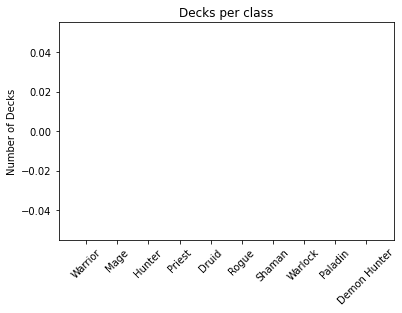

In [14]:
import numpy as np
import matplotlib.pyplot as plt

performance = []
#number of decks of each class
for class_ in classes:
    performance.append(len(class_dictionary[class_]))
    print(class_ + ": " + str(len(class_dictionary[class_])))


y_pos = np.arange(len(classes))
plt.bar(y_pos, performance, align="center", alpha=0.5)
plt.xticks(y_pos, classes, rotation = 45)
plt.ylabel('Number of Decks')
plt.title('Decks per class')
plt.show()

In [15]:
#try to get the weights from the generator and use those in random.choices()
#New: testing
import random

def sort_by_class(cl, cards):
    class_cards = []
    for card in cards:
        #check for multiclass cards
        if 'classes' in card and cl in card['classes']:
            #print(card['name'])
            for class_ in card['classes']:
                class_cards.append(card)
        else: 
            if card['playerClass'] == cl: #or card['playerClass'] == 'Neutral' if I want to add Neutrals
                class_cards.append(card)
    return class_cards

#I use 2 separate decks to increase the chances that a class card is picked otherwise there would be an imbalanced dataset
def generate_fake_deck(class_cards, neutral_cards):
    deck = []
    for i in range(30):
        x = random.randint(1,2)
        #print(x)
        if(x % 2 == 0):
            deck.append(random.choice(class_cards))
        else:
            deck.append(random.choice(neutral_cards))
    return deck_to_vector(deck)

class_cards = sort_by_class('Hunter', cards)
neutral_cards = sort_by_class('Neutral', cards)

fake_deck = generate_fake_deck(class_cards,neutral_cards) 

#print([x['name'] for x in fake_deck])
vec = [x for x in fake_deck]
print(vec)
d_vec = vector_to_deck(vec)
print([x['name'] for x in d_vec])
#print(deck_to_vector(fake_deck))

[1103, 997, 64, 1060, 371, 155, 668, 1182, 599, 277, 1221, 912, 420, 318, 632, 195, 33, 422, 1166, 123, 465, 786, 229, 149, 767, 334, 988, 734, 709, 299]
['Smug Senior', 'Rotnest Drake', 'Demon Companion', 'Evasive Wyrm', 'Pack Tactics', 'Resizing Pouch', "Shan'do Wildclaw", 'Vereesa Windrunner', 'Kill Command', 'Doomsayer', 'Pit Crocolisk', 'Blood Herald', 'Snake Trap', "Hunter's Mark", 'Nine Lives', 'Tour Guide', 'Arcane Shot', 'Snipe', "Shu'ma", 'Mogu Cultist', 'Ace Hunter Kreen', 'Hippogryph', 'Arcane Servant', 'Rapid Fire', 'Fishy Flyer', 'Knife Juggler', 'Phalanx Commander', 'Circus Medic', 'Zixor, Apex Predator', 'Fishflinger']


In [16]:
deck_list[0]

[{'cardId': 'BT_121',
  'dbfId': '56508',
  'name': "Imprisoned Gan'arg",
  'cardSet': 'Ashes of Outland',
  'type': 'Minion',
  'rarity': 'Common',
  'cost': 1,
  'attack': 2,
  'health': 2,
  'text': '<b>Dormant</b> for 2 turns.\\nWhen this awakens,\\nequip a 3/2 Axe.',
  'flavor': 'Factory Direct Fiery War Axe. Please allow two turns for delivery.',
  'artist': 'Ivan Fomin',
  'collectible': True,
  'race': 'Demon',
  'playerClass': 'Warrior',
  'img': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/b5d2910686d797f3e762ccb4159599e227d594a9d7e5dad864fee508fb259bb9.png',
  'locale': 'enUS',
  'id': 332},
 {'cardId': 'BT_121',
  'dbfId': '56508',
  'name': "Imprisoned Gan'arg",
  'cardSet': 'Ashes of Outland',
  'type': 'Minion',
  'rarity': 'Common',
  'cost': 1,
  'attack': 2,
  'health': 2,
  'text': '<b>Dormant</b> for 2 turns.\\nWhen this awakens,\\nequip a 3/2 Axe.',
  'flavor': 'Factory Direct Fiery War Axe. Please allow two turns for delivery.',
  'artist': 'Ivan Fomin',
  '

In [19]:
import copy

#After adding sorting there have been more instances of more precise decks
#It seems that when the AI initially trains with a better initial start it the sorting results in more accurate decks than without sorting
# however I have also noticed that sometimes it has trouble training
#still inconsistant, need to find a way to make it more consistant - maybe by always testing with the same generated deck?
#when attempting to create a warrior deck it tends to have lots of mage cards

#BE CAREFUL OF PREVIOUS ID'S GETTING MIXED UP

#I need to reidentify cards id otherwise it doesn't make a difference

#BUG WHERE DECKS ARENT ID CORRECTLY

grp_classes = classes + ['Neutral']
print(grp_classes)

def groupby_cost(cards):
    sorted_list = sorted(cards, key=lambda i: i['cost'])
    return sorted_list    

def groupby_class(classes, cards):
    sorted_deck = []
    for class_ in classes:
        class_deck = sort_by_class(class_, cards)
        class_deck = groupby_cost(class_deck)
        sorted_deck.extend(class_deck)
       # print(sorted_deck)
    return sorted_deck

#reID's everything after card limitation
def limit_card_range(cards, new_deck_list, classes):
    new_cards = groupby_class(classes, cards)
   # print(new_cards[0]['id'])
    i=0
    for card in new_cards:
        card['id'] = i
        i+=1
    #new_deck_list = deck_list.copy()
    #print(new_cards[0]['id'])
    for deck in new_deck_list:
        print([x['name'] for x in deck])
        for card in deck:
            print(card['name'], card['id'])
            temp = next((new_card for new_card in new_cards if new_card['name'] == card['name']), None)
            if(temp != None):
                print(temp['name'], temp['id'])
                card['id'] = temp['id']
            #for new_card in new_cards:
                #print(card['name'])
                #print(new_card)
             #   if card['name'] == new_card['name']:
              #      card['id'] = new_card['id']
               #     break
    return new_cards, new_deck_list

new_deck_list = copy.deepcopy(deck_list)
new_cards = copy.deepcopy(cards)

new_cards, new_deck_list = limit_card_range(new_cards, new_deck_list, ['Warrior', 'Neutral'])

print('Card id: ', cards[0]['id'], new_cards[0]['id'])

#print([x['id'] for x in new_deck_list[0]])
print('Deck list: \n', [x['name'] for x in deck_list[0]],'\n', [x['name'] for x in new_deck_list[0]])
print('Deck id: \n', [x['id'] for x in deck_list[0]],'\n',[x['id'] for x in new_deck_list[0]] )
print(len(cards), len(new_cards))
print(cards[10]['name'], new_cards[10]['name'])

['Warrior', 'Mage', 'Hunter', 'Priest', 'Druid', 'Rogue', 'Shaman', 'Warlock', 'Paladin', 'Demon Hunter', 'Neutral']
["Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Nitroboost Poison', 'Nitroboost Poison', 'Sky Raider', 'Sky Raider', 'Upgrade!', 'Upgrade!', 'Ancharrr', 'Frothing Berserker', 'Frothing Berserker', 'Skybarge', 'Skybarge', "Kor'kron Elite", "Kor'kron Elite", 'Sword Eater', 'Sword Eater', 'Cutting Class', 'Cutting Class', 'Doctor Krastinov', 'Ringmaster Whatley', 'Tent Trasher', 'Tent Trasher', 'Southsea Deckhand', 'Southsea Deckhand', 'Parachute Brigand', 'Parachute Brigand', 'Dread Corsair', 'Dread Corsair', 'Captain Greenskin']
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Nitroboost Poison 6
Nitroboost Poison 9
Nitroboost Poison 6
Nitroboost Poison 9
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Upgrade! 942
Upgrade! 18
Upgrade! 942
Upgrade! 18
Ancharrr 536
Ancharrr 40
Frothing Berserker 1013
Frothing Berserker 55
Frot

Spiked Wheel 15
Spiked Wheel 12
Spiked Wheel 15
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Minefield 38
Minefield 32
Minefield 38
Minefield 32
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Barricade 100
Barricade 68
Barricade 100
Barricade 68
Kargath Bladefist 407
Kargath Bladefist 70
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Rattlegore 303
Rattlegore 104
Armor Vendor 0
Armor Vendor 113
Armor Vendor 0
Armor Vendor 113
C'Thun, the Shattered 165
C'Thun, the Shattered 483
['Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Corsair Cache', 'Corsair Cache', 'Minefield', 'Mi

Commencement 290
Commencement 97
Rattlegore 303
Rattlegore 104
Dimensional Ripper 901
Dimensional Ripper 105
Dimensional Ripper 901
Dimensional Ripper 105
Supreme Abyssal 454
Supreme Abyssal 467
Supreme Abyssal 454
Supreme Abyssal 467
Runaway Blackwing 164
Runaway Blackwing 479
N'Zoth, God of the Deep 167
N'Zoth, God of the Deep 489
Scrapyard Colossus 459
Scrapyard Colossus 490
Scrapyard Colossus 459
Scrapyard Colossus 490
['Inner Rage', 'Inner Rage', 'Shield of Honor', 'Shield of Honor', 'Sky Raider', 'Sky Raider', 'Stage Dive', 'Stage Dive', 'Bumper Car', "Ringmaster's Baton", "Ringmaster's Baton", 'Ancharrr', 'Skybarge', 'Skybarge', 'Sword Eater', 'Sword Eater', 'Ringmaster Whatley', 'Tent Trasher', 'Tent Trasher', 'Grommash Hellscream', 'Hot Air Balloon', 'Hot Air Balloon', 'Southsea Deckhand', 'Southsea Deckhand', 'Faerie Dragon', 'Faerie Dragon', 'Parachute Brigand', 'Parachute Brigand', 'Darkmoon Dirigible', 'Darkmoon Dirigible']
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner 

Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Lord Barov 229
Lord Barov 59
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Sword Eater 117
Sword Eater 80
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Animated Broomstick 175
Animated Broomstick 111
Devoted Maniac 562
Devoted Maniac 309
Devoted Maniac 562
Devoted Maniac 309
Kobold Stickyfinger 593
Kobold Stickyfinger 378
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Athletic Studies', 'Risky Skipper', 'Sky Raider', 'Sword and Board', 'Armorsmith', 'Battle Rage', 'Bumper Car', 'Corsair Cache', 'Frightened Flunky', 'Minefield', 'Slam', 'Bladestorm', 'Bomb Wrangler', 'Bulwark of Azzinoth', 'Coerce', 'EVIL Quartermaster', 'Livewire Lance', 'Lord Barov', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", 'Restless Mummy', 'Sword Eater', 'Brawl', 'Plague of Wrath', 'Ringmaster Whatley', 'Deathwing, Mad Aspect', 'Troublemaker', 'Zephrys the Great', 'Dragonqueen Alexstrasza']
Athletic Studies 176
Ath

['Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Upgrade!', 'Upgrade!', 'Corsair Cache', 'Corsair Cache', 'Minefield', 'Minefield', 'Bladestorm', 'Bladestorm', 'Coerce', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Brawl', 'Cutting Class', 'Cutting Class', 'Doctor Krastinov', 'Blastmaster Boom', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Hoard Pillager', 'Kronx Dragonhoof']
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sword and Board 342
Sword and Board 17
Sword and Board 342
Sword and Board 17
Upgrade! 942
Upgrade! 18
Upgrade! 942
Upgrade! 18
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Minefield 38
Minefield 32
Minefield 38
Minefield 32
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Coerce 221
Coerce 51
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Lord Barov 229
Lord

Y'Shaarj, the Defiler 492
['Athletic Studies', 'Hack the System', "Imprisoned Gan'arg", 'Stage Dive', 'Sword and Board', 'Corsair Cache', 'Minefield', "Ringmaster's Baton", 'Ancharrr', 'Bladestorm', 'Bulwark of Azzinoth', 'Coerce', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Kargath Bladefist', 'Sword Eater', 'Brawl', 'Ringmaster Whatley', 'Scrap Golem', 'Tent Trasher', 'Armagedillo', 'Deathwing, Mad Aspect', 'Questing Explorer', 'Zephrys the Great', 'Circus Amalgam', 'Hoard Pillager', "Sky Gen'ral Kragg", 'Dragonqueen Alexstrasza', "N'Zoth, God of the Deep"]
Athletic Studies 176
Athletic Studies 1
Hack the System 642
Hack the System 4
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Stage Dive 13
Stage Dive 16
Sword and Board 342
Sword and Board 17
Corsair Cache 350
Corsair Cache 25
Minefield 38
Minefield 32
Ringmaster's Baton 44
Ringmaster's Baton 34
Ancharrr 536
Ancharrr 40
Bladestorm 379
Bladestorm 42
Bulwark of Azzinoth 384
Bulwark of Azzinoth 46
Coerce 221
Coerce 51
EVIL Quar

Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Sword Eater 117
Sword Eater 80
Sword Eater 117
Sword Eater 80
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Rattlegore 303
Rattlegore 104
Soulbound Ashtongue 340
Soulbound Ashtongue 140
Silas Darkmoon 152
Silas Darkmoon 451
['Shield Slam', 'Shield Slam', 'Upgrade!', 'Upgrade!', 'Corsair Cache', 'Corsair Cache', 'Minefield', 'Minefield', 'Bladestorm', 'Bladestorm', 'Clockwork Goblin', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Brawl', 'Cutting Class', 'Cutting Class', 'Ringmaster Whatley', 'Blastmaster Boom', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Acidic Swamp Ooze', 'Ironbeak Owl', 'Hoard Pillager', 'Hoard Pillager']
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
U

Kargath Bladefist 70
Ringmaster Whatley 135
Ringmaster Whatley 89
Tent Trasher 136
Tent Trasher 91
Armagedillo 741
Armagedillo 92
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Tomb Warden 761
Tomb Warden 102
Tomb Warden 761
Tomb Warden 102
Circus Amalgam 102
Circus Amalgam 302
Circus Amalgam 102
Circus Amalgam 302
Fishy Flyer 248
Fishy Flyer 319
Hoard Pillager 571
Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
Strongman 153
Strongman 453
Carnival Clown 162
Carnival Clown 474
Carnival Clown 162
Carnival Clown 474
N'Zoth, God of the Deep 167
N'Zoth, God of the Deep 489
Scrapyard Colossus 459
Scrapyard Colossus 490
Y'Shaarj, the Defiler 168
Y'Shaarj, the Defiler 492
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Stage Dive', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'E.T.C., God of Metal', 'Ancharrr', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bulwark of Azzinoth', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord B

Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Lord Barov 229
Lord Barov 59
Warmaul Challenger 400
Warmaul Challenger 64
Warmaul Challenger 400
Warmaul Challenger 64
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Sword Eater 117
Sword Eater 80
Sword Eater 117
Sword Eater 80
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'E.T.C., God of Metal', 'Minefield', 'Ancharrr', 'Bladestorm', 'Bladestorm', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bulwark of Azzinoth', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Sword Eater', 'Sword Eater', 'Brawl', 'Brawl', 'Cutting Class', 'Galakrond, the Unbreakable', 'Rattlegore', 'Animated Broomstick', 'Pen Flinger']
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Armorsmith 950
Armorsmith 20


Frightened Flunky 666
Frightened Flunky 29
In Formation! 208
In Formation! 31
Minefield 38
Minefield 32
Bladestorm 379
Bladestorm 42
Coerce 221
Coerce 51
EVIL Quartermaster 547
EVIL Quartermaster 52
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Sword Eater 117
Sword Eater 80
Brawl 1079
Brawl 83
Plague of Wrath 738
Plague of Wrath 88
Ringmaster Whatley 135
Ringmaster Whatley 89
Scrap Golem 429
Scrap Golem 90
Armagedillo 741
Armagedillo 92
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Tomb Warden 761
Tomb Warden 102
Zephrys the Great 686
Zephrys the Great 224
Circus Amalgam 102
Circus Amalgam 302
Fishy Flyer 248
Fishy Flyer 319
Siamat 754
Siamat 450
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 475
C'Thun, the Shattered 165
C'Thun, the Shattered 483
N'Zoth, God of the Deep 167
N'Zoth, God of the Deep 489
['Sky Raider', 'Sky Raider', 'Upgrade!', 'Upgrade!', 'Bumper Car', 'Bumper Car', "Ringmaster's Baton", "Ringmaster

Pen Flinger 134
['Shield Slam', 'Shield Slam', 'Stage Dive', 'Stage Dive', 'Sword and Board', 'Sword and Board', 'Minefield', 'Minefield', 'Bladestorm', 'Bladestorm', 'Coerce', 'Coerce', 'Lord Barov', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Molten Breath', 'Molten Breath', 'Sword Eater', 'Sword Eater', 'Brawl', 'Brawl', 'Ringmaster Whatley', 'Deathwing, Mad Aspect', 'Cobalt Spellkin', 'Claw Machine', 'Evasive Wyrm', 'Onyx Magescribe', 'Archivist Elysiana', "C'Thun, the Shattered"]
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Stage Dive 13
Stage Dive 16
Stage Dive 13
Stage Dive 16
Sword and Board 342
Sword and Board 17
Sword and Board 342
Sword and Board 17
Minefield 38
Minefield 32
Minefield 38
Minefield 32
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Coerce 221
Coerce 51
Coerce 221
Coerce 51
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Molten Breat

Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Ringmaster's Baton 44
Ringmaster's Baton 34
Ringmaster's Baton 44
Ringmaster's Baton 34
Stage Hand 51
Stage Hand 37
Stage Hand 51
Stage Hand 37
Ancharrr 536
Ancharrr 40
Skybarge 558
Skybarge 63
Skybarge 558
Skybarge 63
Sword Eater 117
Sword Eater 80
Sword Eater 117
Sword Eater 80
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Ringmaster Whatley 135
Ringmaster Whatley 89
Tent Trasher 136
Tent Trasher 91
Tent Trasher 136
Tent Trasher 91
Bloodsail Corsair 918
Bloodsail Corsair 116
Bloodsail Corsair 918
Bloodsail Corsair 116
Southsea Deckhand 940
Southsea Deckhand 141
Southsea Deckhand 940
Southsea Deckhand 141
Parachute Brigand 528
Parachute Brigand 197
Parachute Brigand 528
Parachute Brigand 197
Darkmoon Dirigible 61
Darkmoon Dirigible 236
Darkmoon Dirigible 61
Darkmoon Dirigible 236
Big Ol' Whelp 585
Big Ol' Whelp 358
Big Ol' Whelp 585
Big Ol' Whelp 358
Claw Machine 140
Claw Machine 410
Claw Machine 140
Claw Machine 410
['Shield Slam', 

Coerce 51
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Molten Breath 573
Molten Breath 72
Molten Breath 573
Molten Breath 72
Sword Eater 117
Sword Eater 80
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Ringmaster Whatley 135
Ringmaster Whatley 89
Tent Trasher 136
Tent Trasher 91
Tent Trasher 136
Tent Trasher 91
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Circus Amalgam 102
Circus Amalgam 302
Circus Amalgam 102
Circus Amalgam 302
Hecklebot 837
Hecklebot 324
Hecklebot 837
Hecklebot 324
C'Thun, the Shattered 165
C'Thun, the Shattered 483
N'Zoth, God of the Deep 167
N'Zoth, God of the Deep 489
['Risky Skipper', 'Shield Slam', 'Stage Dive', 'Whirlwind', 'Armorsmith', 'Battle Rage', 'Corsair Cache', 'Minefield', 'Ancharrr', 'Bladestorm', 'Bloodsworn Mercenary', 'EVIL Quartermaster', 'Livewire Lance', 'Lord B

Stage Dive 16
Stage Dive 13
Stage Dive 16
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Ritual Chopper 530
Ritual Chopper 35
Ritual Chopper 530
Ritual Chopper 35
Ancharrr 536
Ancharrr 40
Awaken! 537
Awaken! 41
Awaken! 537
Awaken! 41
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Lord Barov 229
Lord Barov 59
Kor'kron Elite 1256
Kor'kron Elite 71
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Devoted Maniac 562
Devoted Maniac 309
Devoted Maniac 562
Devoted Maniac 309
Shield of Galakrond 598
Shield of Galakrond 390
Shield of Galakrond 598
Shield of Galakrond 390
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Athletic Studies', 'Athletic Studies', 'Stage Dive', 'Stage Dive', '

Sword and Board 342
Sword and Board 17
Sword and Board 342
Sword and Board 17
Ringmaster's Baton 44
Ringmaster's Baton 34
Ringmaster's Baton 44
Ringmaster's Baton 34
Ancharrr 536
Ancharrr 40
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Reaper's Scythe 256
Reaper's Scythe 75
Reaper's Scythe 256
Reaper's Scythe 75
Sword Eater 117
Sword Eater 80
Sword Eater 117
Sword Eater 80
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Ringmaster Whatley 135
Ringmaster Whatley 89
Scrap Golem 429
Scrap Golem 90
Scrap Golem 429
Scrap Golem 90
Tent Trasher 136
Tent Trasher 91
Tent Trasher 136
Tent Trasher 91
Armagedillo 741
Armagedillo 92
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Circus Amalgam 102
Circus Amalgam 302
Circus Amalgam 102
Circus Amalgam 302
Fishy Flyer 248
Fishy Flyer 319
N'Zoth, God of the Deep 167
N'Zoth, God of the Deep 489
['Athletic 

Shield Slam 11
Bumper Car 17
Bumper Car 22
Bumper Car 17
Bumper Car 22
E.T.C., God of Metal 27
E.T.C., God of Metal 27
Slam 987
Slam 36
Slam 987
Slam 36
Coerce 221
Coerce 51
Coerce 221
Coerce 51
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Lord Barov 229
Lord Barov 59
Playmaker 233
Playmaker 60
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Reaper's Scythe 256
Reaper's Scythe 75
Restless Mummy 720
Restless Mummy 76
Restless Mummy 720
Restless Mummy 76
Brawl 1079
Brawl 83
Animated Broomstick 175
Animated Broomstick 111
Animated Broomstick 175
Animated Broomstick 111
Parade Leader 40
Parade Leader 198
Parade Leader 40
Parade Leader 198
Derailed Coaster 122
Derailed Coaster 366
Derailed Coaster 122
Derailed Coaster 366
Faceless Corruptor 592
Faceless Corruptor 368
Faceless Corruptor 592
Faceless Corruptor 368
['Athletic Studies', "Imprisoned Gan'arg", 'Risky Skipper', 'Shield Slam'

Bladestorm 42
Bladestorm 379
Bladestorm 42
Coerce 221
Coerce 51
Coerce 221
Coerce 51
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Omega Devastator 843
Omega Devastator 74
Omega Devastator 843
Omega Devastator 74
Reaper's Scythe 256
Reaper's Scythe 75
Reaper's Scythe 256
Reaper's Scythe 75
Restless Mummy 720
Restless Mummy 76
Restless Mummy 720
Restless Mummy 76
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Ringmaster Whatley 135
Ringmaster Whatley 89
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Hoard Pillager 571
Hoard Pillager 327
C'Thun, the Shattered 165
C'Thun, the Shattered 483
['Boom Squad', 'Boom Squad', 'Sky Raider', 'Sky Raider', "Ringmaster's Baton", "Ringmaster's Baton", 'Ancharrr', 'Awaken!', 'Awaken!', 'Clockwork Goblin',

Soulbound Ashtongue 140
Silas Darkmoon 152
Silas Darkmoon 451
['Athletic Studies', 'Athletic Studies', 'Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Ancharrr', 'Bladestorm', 'Bladestorm', 'Coerce', 'Coerce', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Wrenchcalibur', 'Wrenchcalibur', 'Doctor Krastinov', 'Deathwing, Mad Aspect', 'Soulbound Ashtongue', 'Silas Darkmoon']
Athletic Studies 176
Athletic Studies 1
Athletic Studies 176
Athletic Studies 1
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sky Raider 513
Sky Raider 14
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Ancha

Sword and Board 17
Corsair Cache 350
Corsair Cache 25
Bladestorm 379
Bladestorm 42
Bulwark of Azzinoth 384
Bulwark of Azzinoth 46
Coerce 221
Coerce 51
EVIL Quartermaster 547
EVIL Quartermaster 52
Livewire Lance 701
Livewire Lance 57
Lord Barov 229
Lord Barov 59
Ramming Speed 554
Ramming Speed 61
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Reaper's Scythe 256
Reaper's Scythe 75
Restless Mummy 720
Restless Mummy 76
Brawl 1079
Brawl 83
Doctor Krastinov 266
Doctor Krastinov 87
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Troublemaker 300
Troublemaker 103
Rattlegore 303
Rattlegore 104
Bonechewer Brawler 349
Bonechewer Brawler 158
Cult Neophyte 206
Cult Neophyte 163
Zephrys the Great 686
Zephrys the Great 224
Headmaster Kel'Thuzad 267
Headmaster Kel'Thuzad 377
Lorekeeper Polkelt 270
Lorekeeper Polkelt 380
Ruststeed Raider 428
Ruststeed Raider 389
Khartut Defender 745
Khartut Defender 418
Kron

Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Sword and Board 342
Sword and Board 17
Armorsmith 950
Armorsmith 20
Corsair Cache 350
Corsair Cache 25
Frightened Flunky 666
Frightened Flunky 29
Ritual Chopper 530
Ritual Chopper 35
Awaken! 537
Awaken! 41
Bladestorm 379
Bladestorm 42
Bomb Wrangler 475
Bomb Wrangler 44
Bulwark of Azzinoth 384
Bulwark of Azzinoth 46
Coerce 221
Coerce 51
EVIL Quartermaster 547
EVIL Quartermaster 52
Livewire Lance 701
Livewire Lance 57
Lord Barov 229
Lord Barov 59
Ramming Speed 554
Ramming Speed 61
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Reaper's Scythe 256
Reaper's Scythe 75
Restless Mummy 720
Restless Mummy 76
Brawl 1079
Brawl 83
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Troublemaker 300
Troublemaker 103
Zephrys the Great 686
Zephrys the Great 224
Devoted Maniac 562
Devoted Maniac 309
Shield of Galakrond 598
Shield of Galakrond 390


Southsea Deckhand 141
Southsea Deckhand 940
Southsea Deckhand 141
Bloodsail Raider 954
Bloodsail Raider 156
Bloodsail Raider 954
Bloodsail Raider 156
Parachute Brigand 528
Parachute Brigand 197
Parachute Brigand 528
Parachute Brigand 197
Southsea Captain 1036
Southsea Captain 284
Southsea Captain 1036
Southsea Captain 284
Voracious Reader 241
Voracious Reader 291
Voracious Reader 241
Voracious Reader 291
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
['Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Upgrade!', 'Upgrade!', 'Whirlwind', 'Whirlwind', 'Corsair Cache', 'Corsair Cache', 'Bladestorm', 'Bladestorm', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Brawl', 'Cutting Class', 'Cutting Class', 'Doctor Krastinov', 'Blastmaster Boom', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Hoard Pillager', 'Hoard Pillager', 'Kronx Dragonhoof']
Shield Sla

Corsair Cache 25
Awaken! 537
Awaken! 41
Awaken! 537
Awaken! 41
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Doctor Krastinov 266
Doctor Krastinov 87
Blastmaster Boom 879
Blastmaster Boom 94
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Devoted Maniac 562
Devoted Maniac 309
Devoted Maniac 562
Devoted Maniac 309
Hoard Pillager 571
Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
Captain Greenskin 1080
Captain Greenskin 361
Shield of Galakrond 598
Shield of Galakrond 390
Shield of Galakrond 598
Shield of Galakrond 390
Kronx Dragonhoof 612
Kronx Dragonhoof 419
["Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Sky Raider', 'Sky Raider', 'Upgrade!'

Sky Gen'ral Kragg 483
Sky Gen'ral Kragg 341
Captain Greenskin 1080
Captain Greenskin 361
['Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Whirlwind', 'Whirlwind', 'Corsair Cache', 'Corsair Cache', 'Bladestorm', 'Bladestorm', 'Clockwork Goblin', 'Clockwork Goblin', 'Coerce', 'Lord Barov', 'Shield Block', 'Shield Block', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Brawl', 'Cutting Class', 'Cutting Class', 'Doctor Krastinov', 'Blastmaster Boom', 'Galakrond, the Unbreakable', 'Youthful Brewmaster', 'Youthful Brewmaster', 'Hoard Pillager', 'Hoard Pillager', 'Kronx Dragonhoof']
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sword and Board 342
Sword and Board 17
Sword and Board 342
Sword and Board 17
Whirlwind 1192
Whirlwind 19
Whirlwind 1192
Whirlwind 19
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Clockwork Goblin 817
Clockwork Goblin 49
Clockwork Goblin 817
Clockwork Gobl

Playmaker 60
Ramming Speed 554
Ramming Speed 61
Shield Block 1239
Shield Block 62
Warmaul Challenger 400
Warmaul Challenger 64
Kargath Bladefist 407
Kargath Bladefist 70
Reaper's Scythe 256
Reaper's Scythe 75
Restless Mummy 720
Restless Mummy 76
Brawl 1079
Brawl 83
Plague of Wrath 738
Plague of Wrath 88
Scrap Golem 429
Scrap Golem 90
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Troublemaker 300
Troublemaker 103
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Zephrys the Great 686
Zephrys the Great 224
Headmaster Kel'Thuzad 267
Headmaster Kel'Thuzad 377
Kobold Stickyfinger 593
Kobold Stickyfinger 378
Siamat 754
Siamat 450
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 475
['Athletic Studies', 'Athletic Studies', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Upgrade!', 'Upgrade!', 'Corsair Cache', 'Corsair Cache', 'Bladestorm', 'Bladestorm', 'Coerce', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Brawl', '

Doctor Krastinov 266
Doctor Krastinov 87
Armored Goon 742
Armored Goon 93
Blastmaster Boom 879
Blastmaster Boom 94
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Grommash Hellscream 1129
Grommash Hellscream 101
Troublemaker 300
Troublemaker 103
Sphere of Sapience 196
Sphere of Sapience 142
Zephrys the Great 686
Zephrys the Great 224
Captain Greenskin 1080
Captain Greenskin 361
Kronx Dragonhoof 612
Kronx Dragonhoof 419
Siamat 754
Siamat 450
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 475
['Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Upgrade!', 'Upgrade!', 'Whirlwind', 'Whirlwind', 'Corsair Cache', 'Corsair Cache', 'Bladestorm', 'Bladestorm', 'Coerce', 'Lord Barov', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Brawl', 'Cutting Class', 'Cutting Class', 'Doctor Krastinov', 'Plague of Wrath', 'Blastmaster Boom', 'Galakrond, the Unbreakable', '

Lorekeeper Polkelt 270
Lorekeeper Polkelt 380
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Ancharrr', 'Bladestorm', 'Bladestorm', 'Bomb Wrangler', 'Bomb Wrangler', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Doctor Krastinov', 'Blastmaster Boom', 'Bloodboil Brute', 'Bloodboil Brute', 'Deathwing, Mad Aspect', 'Hoard Pillager']
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Ancharrr 536
Ancharrr 40
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42


Bloodboil Brute 441
Bloodboil Brute 95
Grommash Hellscream 1129
Grommash Hellscream 101
Serpent Egg 679
Serpent Egg 206
Serpent Egg 679
Serpent Egg 206
Teron Gorefiend 396
Teron Gorefiend 287
['Athletic Studies', 'Athletic Studies', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Whirlwind', 'Corsair Cache', 'Corsair Cache', 'Execute', 'Bladestorm', 'Bladestorm', 'Bulwark of Azzinoth', 'Shield Block', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", "Reaper's Scythe", 'Brawl', 'Brawl', 'Commencement', 'Commencement', 'Deathwing, Mad Aspect', 'Troublemaker', 'Troublemaker', 'Rattlegore', 'Dimensional Ripper', 'Dimensional Ripper', 'Archmage Vargoth', 'Scrapyard Colossus']
Athletic Studies 176
Athletic Studies 1
Athletic Studies 176
Athletic Studies 1
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sword and Board 342
Sword and Board 17
Sword and Board 342
Sword and Board 17
Whirlwind 1192
Whirlwind 19
Corsair Cache 350
Corsair Cache 25
Corsair C

Ceremonial Maul 48
Coerce 221
Coerce 51
Coerce 221
Coerce 51
Lord Barov 229
Lord Barov 59
Playmaker 233
Playmaker 60
Playmaker 233
Playmaker 60
Reaper's Scythe 256
Reaper's Scythe 75
Reaper's Scythe 256
Reaper's Scythe 75
Steeldancer 260
Steeldancer 79
Steeldancer 260
Steeldancer 79
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Doctor Krastinov 266
Doctor Krastinov 87
Commencement 290
Commencement 97
Commencement 290
Commencement 97
Troublemaker 300
Troublemaker 103
Troublemaker 300
Troublemaker 103
Rattlegore 303
Rattlegore 104
Animated Broomstick 175
Animated Broomstick 111
Tour Guide 198
Tour Guide 144
Robes of Protection 235
Robes of Protection 278
Voracious Reader 241
Voracious Reader 291
Fishy Flyer 248
Fishy Flyer 319
['Athletic Studies', 'Athletic Studies', 'Sword and Board', 'Sword and Board', 'Corsair Cache', 'Corsair Cache', 'Bladestorm', 'Bladestorm', 'Ceremonial Maul', 'Coerce', 'Coerce', 'Shield Block', 'Shield Block', 'Kargath Bladefist', "Reaper'

Playmaker 60
Playmaker 233
Playmaker 60
Kargath Bladefist 407
Kargath Bladefist 70
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Devoted Maniac 562
Devoted Maniac 309
Devoted Maniac 562
Devoted Maniac 309
Shield of Galakrond 598
Shield of Galakrond 390
Shield of Galakrond 598
Shield of Galakrond 390
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Corsair Cache', 'Corsair Cache', 'Execute', 'Execute', 'Bladestorm', 'Bladestorm', 'Clockwork Goblin', 'Clockwork Goblin', 'Coerce', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", "Reaper's Scythe", 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Plague of Wrath', 'Blastmaster Boom', 'Troublemaker', 'Troublemaker']
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sword and 

Troublemaker 103
Rattlegore 303
Rattlegore 104
Dimensional Ripper 901
Dimensional Ripper 105
Dimensional Ripper 901
Dimensional Ripper 105
The Boom Reaver 905
The Boom Reaver 106
Archmage Vargoth 833
Archmage Vargoth 296
Colossus of the Moon 766
Colossus of the Moon 484
Scrapyard Colossus 459
Scrapyard Colossus 490
['Athletic Studies', 'Athletic Studies', 'Shield Slam', 'Shield Slam', 'Corsair Cache', 'Corsair Cache', 'In Formation!', 'In Formation!', 'Livewire Lance', 'Livewire Lance', 'Shield Block', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", "Reaper's Scythe", 'Brawl', 'Brawl', 'Commencement', 'Commencement', 'Deathwing, Mad Aspect', 'Grommash Hellscream', 'Troublemaker', 'Troublemaker', 'Rattlegore', 'Dimensional Ripper', 'Dimensional Ripper', 'The Boom Reaver', 'Keymaster Alabaster', 'Scrapyard Colossus', 'Scrapyard Colossus']
Athletic Studies 176
Athletic Studies 1
Athletic Studies 176
Athletic Studies 1
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
C

Frothing Berserker 1013
Frothing Berserker 55
Livewire Lance 701
Livewire Lance 57
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Reaper's Scythe 256
Reaper's Scythe 75
Restless Mummy 720
Restless Mummy 76
Brawl 1079
Brawl 83
Doctor Krastinov 266
Doctor Krastinov 87
Bloodboil Brute 441
Bloodboil Brute 95
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Troublemaker 300
Troublemaker 103
Bloodsail Raider 954
Bloodsail Raider 156
Zephrys the Great 686
Zephrys the Great 224
Dread Corsair 1055
Dread Corsair 314
Hoard Pillager 571
Hoard Pillager 327
Headmaster Kel'Thuzad 267
Headmaster Kel'Thuzad 377
Siamat 754
Siamat 450
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 475
['Athletic Studies', 'Execute', 'Execute', 'In Formation!', 'In Formation!', 'Bomb Wrangler', 'Bomb Wrangler', 'Coerce', 'Coerce', 'Livewire Lance', 'Livewire Lance', 'Lord Barov', 'Ramming Speed', 'Ramming Speed', 'Kargath Bladefist', "Reaper's Scythe", "Re

Scrap Golem 90
Scrap Golem 429
Scrap Golem 90
Armagedillo 741
Armagedillo 92
Tomb Warden 761
Tomb Warden 102
Tomb Warden 761
Tomb Warden 102
Infested Goblin 700
Infested Goblin 260
Infested Goblin 700
Infested Goblin 260
Faceless Lurker 733
Faceless Lurker 369
Faceless Lurker 733
Faceless Lurker 369
Phalanx Commander 737
Phalanx Commander 386
Phalanx Commander 737
Phalanx Commander 386
Scrapyard Colossus 459
Scrapyard Colossus 490
Scrapyard Colossus 459
Scrapyard Colossus 490
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bulwark of Azzinoth', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Shield Block', 'Shield Block', "Kor'kron Elite", "Kor'kron Elite", 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Brawl', 'Blastmaster Boom', 'Bloodboil Brute', 'Bloodboil Brute', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Captain Green

Troublemaker 103
Troublemaker 300
Troublemaker 103
Rattlegore 303
Rattlegore 104
Dimensional Ripper 901
Dimensional Ripper 105
Dimensional Ripper 901
Dimensional Ripper 105
Archmage Vargoth 833
Archmage Vargoth 296
Colossus of the Moon 766
Colossus of the Moon 484
Scrapyard Colossus 459
Scrapyard Colossus 490
['Inner Rage', 'Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Shield of Honor', 'Shield of Honor', 'Shield Slam', 'Shield Slam', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Rampage', 'Rampage', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'Warmaul Challenger', 'Warmaul Challenger', 'Mortal Strike', 'Mortal Strike', "Reaper's Scythe", "Reaper's Scythe", 'Plague of Wrath', 'Plague of Wrath', 'Bloodboil Brute', 'Bloodboil Brute', 'Deathwing, Mad Aspect', "Headmaster Kel'Thuzad"]
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield of Honor 195
Shield o

Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Rampage 985
Rampage 33
Rampage 985
Rampage 33
Ancharrr 536
Ancharrr 40
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Warmaul Challenger 400
Warmaul Challenger 64
Warmaul Challenger 400
Warmaul Challenger 64
Kor'kron Elite 1256
Kor'kron Elite 71
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Grommash Hellscream 1129
Grommash Hellscream 101
Serpent Egg 679
Serpent Egg 206
Serpent Egg 679
Serpent Egg 206
Teron Gorefiend 396
Teron Gorefiend 287
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Sky Raider', 'Sky Raider', 'Sword and Board', 'Sword and Board', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle 

Armorsmith 950
Armorsmith 20
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Bonechewer Raider 383
Bonechewer Raider 45
Bonechewer Raider 383
Bonechewer Raider 45
Frothing Berserker 1013
Frothing Berserker 55
Frothing Berserker 1013
Frothing Berserker 55
Lord Barov 229
Lord Barov 59
Playmaker 233
Playmaker 60
Playmaker 233
Playmaker 60
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Restless Mummy 720
Restless Mummy 76
Restless Mummy 720
Restless Mummy 76
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Troublemaker 300
Troublemaker 103
Troublemaker 300
Troublemaker 103
Rattlegore 303
Rattlegore 104
Transfer Student 215
Transfer Student 215
Big Ol' Whelp 585
Big Ol' Whelp 358
Big Ol' Whelp 585
Big Ol' Whelp 358
Cairne Bloodhoof 1102
Cairne Bloodhoof 408
Plagued Protodrake 298
Plagued Protodrake 466
Plagued Proto

Slam 987
Slam 36
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Bonechewer Raider 383
Bonechewer Raider 45
Bonechewer Raider 383
Bonechewer Raider 45
Frothing Berserker 1013
Frothing Berserker 55
Frothing Berserker 1013
Frothing Berserker 55
Bloodboil Brute 441
Bloodboil Brute 95
Grommash Hellscream 1129
Grommash Hellscream 101
Guardian Augmerchant 330
Guardian Augmerchant 122
Guardian Augmerchant 330
Guardian Augmerchant 122
Amani Berserker 946
Amani Berserker 151
Amani Berserker 946
Amani Berserker 151
Bonechewer Brawler 349
Bonechewer Brawler 158
Bonechewer Brawler 349
Bonechewer Brawler 158
Gurubashi Berserker 1278
Gurubashi Berserker 374
Bonechewer Vanguard 442
Bonechewer Vanguard 440
['Risky Skipper', 'Risky Skipper', 'Sky Raider', 'Sky Raider', 'Battle Rage', 'Battle Rage', 'Frightened Flunky', 'Frightened Flunky', 'Ritual Chopper', 'Ritual Chopper', 'Awaken!'

Wrenchcalibur 81
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Dimensional Ripper 901
Dimensional Ripper 105
Dimensional Ripper 901
Dimensional Ripper 105
The Boom Reaver 905
The Boom Reaver 106
Ysera 1142
Ysera 481
Colossus of the Moon 766
Colossus of the Moon 484
Scrapyard Colossus 459
Scrapyard Colossus 490
['Hack the System', 'Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Ancharrr', 'Bladestorm', 'Bladestorm', 'Bomb Wrangler', 'Bomb Wrangler', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Blastmaster Boom', 'Bloodboil Brute', 'Bloodboil Brute', 'Grommash Hellscream', 'Hoard Pillager', "Sky Gen'ral Kragg"]
Hack the System 642
Hack the System 4
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 

Bonechewer Vanguard 442
Bonechewer Vanguard 440
Evasive Drakonid 617
Evasive Drakonid 443
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Execute', 'Ancharrr', 'Bladestorm', 'Bladestorm', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Livewire Lance', 'Livewire Lance', 'Shield Block', 'Shield Block', 'Warmaul Challenger', 'Kargath Bladefist', 'Restless Mummy', 'Brawl', 'Brawl', 'Plague of Wrath', 'Deathwing, Mad Aspect', 'Magtheridon', 'Kobold Stickyfinger', 'Archivist Elysiana']
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Execute 1199
Execute 28
Ancharrr 536
Ancharrr 40
Bladestorm 379
Bladestorm 42
Bladest

Parachute Brigand 197
Ironbeak Owl 1019
Ironbeak Owl 262
Southsea Captain 1036
Southsea Captain 284
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Hoard Pillager 571
Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Sky Raider', 'Sky Raider', 'Sword and Board', 'Sword and Board', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Ancharrr', 'Bladestorm', 'Bladestorm', 'Bomb Wrangler', 'Bomb Wrangler', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Blastmaster Boom', 'Bloodboil Brute', 'Bloodboil Brute', 'Deathwing, Mad Aspect', 'Hoard Pillager']
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Sword and Board 342
Sword and Board 17
Sword and Board 342
Sword a

Clockwork Goblin 49
Clockwork Goblin 817
Clockwork Goblin 49
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Scrap Golem 429
Scrap Golem 90
Scrap Golem 429
Scrap Golem 90
Armored Goon 742
Armored Goon 93
Blastmaster Boom 879
Blastmaster Boom 94
Grand Lackey Erkh 482
Grand Lackey Erkh 323
Hoard Pillager 571
Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
Sky Gen'ral Kragg 483
Sky Gen'ral Kragg 341
Captain Greenskin 1080
Captain Greenskin 361
['Hack the System', 'Sky Raider', 'Sky Raider', 'Upgrade!', 'Corsair Cache', 'Corsair Cache', 'Heroic Strike', 'Heroic Strike', 'Ancharrr', 'Fiery War Axe', 'Livewire Lance', "Kor'kron Elite", "Kor'kron Elite"

Into the Fray 7
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Frightened Flunky 666
Frightened Flunky 29
Frightened Flunky 666
Frightened Flunky 29
Ancharrr 536
Ancharrr 40
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Scrap Golem 429
Scrap Golem 90
Scrap Golem 429
Scrap Golem 90
Armagedillo 741
Armagedillo 92
Overconfident Orc 394
Overconfident Orc 273
Overconfident Orc 394
Overconfident Orc 273
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
["Imprisoned Gan'arg", 'Risky Skipper', 'Shield 

Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Ritual Chopper 530
Ritual Chopper 35
Ritual Chopper 530
Ritual Chopper 35
Ancharrr 536
Ancharrr 40
Awaken! 537
Awaken! 41
Awaken! 537
Awaken! 41
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Warmaul Challenger 400
Warmaul Challenger 64
Warmaul Challenger 400
Warmaul Challenger 64
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Risky Sk

Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Heroic Strike 1203
Heroic Strike 30
Ancharrr 536
Ancharrr 40
Frothing Berserker 1013
Frothing Berserker 55
Frothing Berserker 1013
Frothing Berserker 55
Livewire Lance 701
Livewire Lance 57
Skybarge 558
Skybarge 63
Skybarge 558
Skybarge 63
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Southsea Deckhand 940
Southsea Deckhand 141
Southsea Deckhand 940
Southsea Deckhand 141
Bloodsail Raider 954
Bloodsail Raider 156
Bloodsail Raider 954
Bloodsail Raider 156
Parachute Brigand 528
Parachute Brigand 197
Parachute Brigand 528
Parachute Brigand 197
Southsea Captain 1036
Southsea Captain 284
Southsea Captain 1036
Southsea Captain 284
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Hoard Pillager 571
Hoard Pillager 327
Captain Greenskin 1080
Captain Greenskin 361
['Inner Rage', 'Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Armorsmith', 'Armorsmith'

Bloodsail Raider 156
Bloodsail Raider 954
Bloodsail Raider 156
Imprisoned Vilefiend 360
Imprisoned Vilefiend 177
Imprisoned Vilefiend 360
Imprisoned Vilefiend 177
Parachute Brigand 528
Parachute Brigand 197
Parachute Brigand 528
Parachute Brigand 197
Faceless Rager 820
Faceless Rager 246
Faceless Rager 820
Faceless Rager 246
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
['Inner Rage', 'Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Rampage', 'Rampage', 'Ancharrr', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'Livewire Lance', 'Livewire Lance', 'Warmaul Challenger', 'Warmaul Challenger', "Kor'kron Elite", 'Bloodboil Brute', 'Bloodboil Brute', 'Grommash Hellscream', 'Serpent Egg', 'Serpent Egg', 'Teron Gorefiend']
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Risky Skipper 463
Risky Skipper 10
R

Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Rampage 985
Rampage 33
Rampage 985
Rampage 33
Ancharrr 536
Ancharrr 40
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Livewire Lance 701
Livewire Lance 57
Warmaul Challenger 400
Warmaul Challenger 64
Warmaul Challenger 400
Warmaul Challenger 64
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Serpent Egg 679
Serpent Egg 206
Serpent Egg 679
Serpent Egg 206
Teron Gorefiend 396
Teron Gorefiend 287
['Inne

Shield of Galakrond 390
Shield of Galakrond 598
Shield of Galakrond 390
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Risky Skipper', 'Sword and Board', 'Whirlwind', 'Armorsmith', 'Battle Rage', 'Frightened Flunky', 'Ritual Chopper', 'Awaken!', 'Bladestorm', 'Bomb Wrangler', 'Warmaul Challenger', 'Kargath Bladefist', 'Scion of Ruin', 'Brawl', 'Scrap Golem', 'Armagedillo', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Tomb Warden', 'Acidic Swamp Ooze', 'Bonechewer Brawler', "Injured Tol'vir", 'Wild Pyromancer', 'Zephrys the Great', 'Bone Wraith', 'Devoted Maniac', 'Shield of Galakrond', 'Khartut Defender', 'Kronx Dragonhoof', 'Dragonqueen Alexstrasza']
Risky Skipper 463
Risky Skipper 10
Sword and Board 342
Sword and Board 17
Whirlwind 1192
Whirlwind 19
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Frightened Flunky 666
Frightened Flunky 29
Ritual Chopper 530
Ritual Chopper 35
Awaken! 537
Awaken! 41
Bladestorm 379
Bladestorm 42
Bomb Wrangler 475
Bomb Wrangler 44
War

Injured Tol'vir 178
Infested Goblin 700
Infested Goblin 260
Infested Goblin 700
Infested Goblin 260
Overconfident Orc 394
Overconfident Orc 273
Devoted Maniac 562
Devoted Maniac 309
Devoted Maniac 562
Devoted Maniac 309
Shield of Galakrond 598
Shield of Galakrond 390
Shield of Galakrond 598
Shield of Galakrond 390
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Inner Rage', 'Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Rampage', 'Rampage', 'Ancharrr', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Frothing Berserker', 'Frothing Berserker', 'Livewire Lance', 'Warmaul Challenger', 'Warmaul Challenger', "Kor'kron Elite", 'Bloodboil Brute', 'Bloodboil Brute', "Injured Tol'vir", "Injured Tol'vir", 'Serpent Egg', 'Serpent Egg', 'Teron Gorefiend']
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Sk

Imprisoned Vilefiend 360
Imprisoned Vilefiend 177
Injured Tol'vir 669
Injured Tol'vir 178
Injured Tol'vir 669
Injured Tol'vir 178
Serpent Egg 679
Serpent Egg 206
Serpent Egg 679
Serpent Egg 206
Teron Gorefiend 396
Teron Gorefiend 287
['Hack the System', "Imprisoned Gan'arg", 'Risky Skipper', 'Shield Slam', 'Upgrade!', 'Whirlwind', 'Armorsmith', 'Battle Rage', 'Corsair Cache', 'Execute', 'Ancharrr', 'Bladestorm', 'Bloodsworn Mercenary', 'EVIL Quartermaster', 'Livewire Lance', 'Shield Block', 'Warmaul Challenger', 'Arathi Weaponsmith', 'Kargath Bladefist', 'Brawl', 'Plague of Wrath', 'Armored Goon', 'Deathwing, Mad Aspect', 'Questing Explorer', 'Zephrys the Great', 'Dread Corsair', 'Grand Lackey Erkh', 'Hoard Pillager', "Sky Gen'ral Kragg", 'Dragonqueen Alexstrasza']
Hack the System 642
Hack the System 4
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Upgrade! 942
Upgrade! 18
Whirlwind 1192
Whirlwind 19
Armorsmith 950
Armorsmi

Restless Mummy 720
Restless Mummy 76
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Grommash Hellscream 1129
Grommash Hellscream 101
Injured Tol'vir 669
Injured Tol'vir 178
Injured Tol'vir 669
Injured Tol'vir 178
['Inner Rage', 'Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Whirlwind', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Rampage', 'Rampage', 'Ritual Chopper', 'Ritual Chopper', 'Vicious Scraphound', 'Vicious Scraphound', 'Awaken!', 'Awaken!', 'Bomb Wrangler', 'Bomb Wrangler', 'Frothing Berserker', 'Restless Mummy', 'Restless Mummy', 'Scion of Ruin', 'Scion of Ruin', 'Galakrond, the Unbreakable', 'Grommash Hellscream', 'Devoted Maniac', 'Devoted Maniac', 'Shield of Galakrond', 'Shield of Galakrond']
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Whirlwind 1192
Whirlwind 19
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Ra

Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Blastmaster Boom 879
Blastmaster Boom 94
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Gorehowl 1122
Gorehowl 99
Injured Tol'vir 669
Injured Tol'vir 178
Injured Tol'vir 669
Injured Tol'vir 178
Hoard Pillager 571
Hoard Pillager 327
['Risky Skipper', 'Risky Skipper', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Ancharrr', 'Bomb Wrangler', 'Bomb Wrangler', 'Clockwork Goblin', 'Clockwork Goblin', 'EVIL Quartermaster', 'Shield Block', 'Kargath Bladefist', 'Restless Mummy', 'Restless Mummy', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Brawl', 'Blastmaster Boom', 'Bloodboil Brute', 'Bloodboil Brute', 'Deathwing, Mad Aspect', 'Zephrys the Great', 'Captain Greenskin']
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Armorsmith 950
Armorsmith 20
Armorsmith 950


Shield of Galakrond 390
Shield of Galakrond 598
Shield of Galakrond 390
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Hack the System', "Imprisoned Gan'arg", 'Risky Skipper', 'Risky Skipper', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Ritual Chopper', 'Ritual Chopper', 'Awaken!', 'Awaken!', 'Bomb Wrangler', 'Bulwark of Azzinoth', 'Clockwork Goblin', 'Clockwork Goblin', 'Kargath Bladefist', 'Scion of Ruin', 'Scion of Ruin', 'Wrenchcalibur', 'Wrenchcalibur', 'Blastmaster Boom', 'Galakrond, the Unbreakable', 'Devoted Maniac', 'Devoted Maniac', 'Shield of Galakrond', 'Shield of Galakrond', 'Kronx Dragonhoof']
Hack the System 642
Hack the System 4
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 

Captain Greenskin 361
['Improve Morale', 'Improve Morale', 'Shield Slam', 'Whirlwind', 'Whirlwind', 'Cleave', 'Commanding Shout', 'Corsair Cache', 'Ritual Chopper', 'Ritual Chopper', 'Vicious Scraphound', 'Awaken!', 'Awaken!', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', "Dr. Boom's Scheme", "Kor'kron Elite", 'Mortal Strike', 'Scion of Ruin', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Novice Engineer', 'Devoted Maniac', 'Devoted Maniac', 'Shield of Galakrond', 'Shield of Galakrond', 'Kronx Dragonhoof', 'Sathrovarr']
Improve Morale 777
Improve Morale 6
Improve Morale 777
Improve Morale 6
Shield Slam 938
Shield Slam 11
Whirlwind 1192
Whirlwind 19
Whirlwind 1192
Whirlwind 19
Cleave 1198
Cleave 23
Commanding Shout 956
Commanding Shout 24
Corsair Cache 350
Corsair Cache 25
Ritual Chopper 530
Ritual Chopper 35
Ritual Chopper 530
Ritual Chopper 35
Vicious Scraphound 810
Vicious Scraphound 39
Awaken! 537
Awaken! 41
Awaken! 537
Awaken! 41
Fiery War Axe 1225
Fie

Awaken! 41
Bonechewer Raider 383
Bonechewer Raider 45
Clockwork Goblin 817
Clockwork Goblin 49
EVIL Quartermaster 547
EVIL Quartermaster 52
Fiery War Axe 1225
Fiery War Axe 54
Kargath Bladefist 407
Kargath Bladefist 70
Kor'kron Elite 1256
Kor'kron Elite 71
Restless Mummy 720
Restless Mummy 76
Scion of Ruin 575
Scion of Ruin 77
Wrenchcalibur 853
Wrenchcalibur 81
Arcanite Reaper 1269
Arcanite Reaper 82
Brawl 1079
Brawl 83
Armored Goon 742
Armored Goon 93
Bloodboil Brute 441
Bloodboil Brute 95
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Zephrys the Great 686
Zephrys the Great 224
Devoted Maniac 562
Devoted Maniac 309
Dragonmaw Poacher 564
Dragonmaw Poacher 313
Ruststeed Raider 428
Ruststeed Raider 389
Shield of Galakrond 598
Shield of Galakrond 390
Kronx Dragonhoof 612
Kronx Dragonhoof 419
Siamat 754
Siamat 450
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 475
["Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Sky Raider', 'Sky Raider', 'Upgrade!', 'Upgrade!', 'Corsair C

Whirlwind 19
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Execute 1199
Execute 28
Rampage 985
Rampage 33
Rampage 985
Rampage 33
Slam 987
Slam 36
Slam 987
Slam 36
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Bonechewer Raider 383
Bonechewer Raider 45
Bonechewer Raider 383
Bonechewer Raider 45
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Brawl 1079
Brawl 83
Plague of Wrath 738
Plague of Wrath 88
Plague of Wrath 738
Plague of Wrath 88
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Injured Tol'vir 669
Injured Tol'vir 178
Injured Tol'vir 669
Injured Tol'vir 178
['Inner Rage', 'Inner Rage', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Whirlwind', 'Armorsmith', 'Bat

Bloodsail Corsair 116
Bloodsail Corsair 918
Bloodsail Corsair 116
Southsea Deckhand 940
Southsea Deckhand 141
Southsea Deckhand 940
Southsea Deckhand 141
Bloodsail Raider 954
Bloodsail Raider 156
Bloodsail Raider 954
Bloodsail Raider 156
Parachute Brigand 528
Parachute Brigand 197
Parachute Brigand 528
Parachute Brigand 197
Southsea Captain 1036
Southsea Captain 284
Southsea Captain 1036
Southsea Captain 284
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Hoard Pillager 571
Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
Captain Greenskin 1080
Captain Greenskin 361
["Imprisoned Gan'arg", 'Risky Skipper', 'Shield Slam', 'Sky Raider', 'Sword and Board', 'Battle Rage', 'Corsair Cache', 'Frightened Flunky', 'Ancharrr', 'Bladestorm', 'Bomb Wrangler', 'Clockwork Goblin', 'EVIL Quartermaster', 'Shield Block', 'Warmaul Challenger', 'Kargath Bladefist', 'Omega Devastator', 'Restless Mummy', 'Wrenchcalibur', 'Blastmaster Boom', 'Bloodboil Brute', 'Deathwing, Ma

Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Frightened Flunky 666
Frightened Flunky 29
Frightened Flunky 666
Frightened Flunky 29
Ritual Chopper 530
Ritual Chopper 35
Ritual Chopper 530
Ritual Chopper 35
Awaken! 537
Awaken! 41
Awaken! 537
Awaken! 41
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Restless Mummy 720
Restless Mummy 76
Restless Mummy 720
Restless Mummy 76
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Armagedillo 741
Armagedillo 92
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Tomb Warden 761
Tomb Warden 102
Tomb Warden 761
Tomb Warden 102
Devoted Maniac 562
Devoted Maniac 309
Devoted Maniac 562
Devoted Maniac 309
Maiev Shadowsong 410
Maiev Shadowsong 330
Shield of Galakrond 598
Shield of Galakrond 390
Shield of Galakrond 598
Shield of Galakrond 390
Kronx D

Infested Goblin 260
Infested Goblin 700
Infested Goblin 260
Overconfident Orc 394
Overconfident Orc 273
Overconfident Orc 394
Overconfident Orc 273
Hippogryph 570
Hippogryph 326
Hippogryph 570
Hippogryph 326
Ruststeed Raider 428
Ruststeed Raider 389
Ruststeed Raider 428
Ruststeed Raider 389
Siamat 754
Siamat 450
['Inner Rage', 'Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Ritual Chopper', 'Ritual Chopper', 'Awaken!', 'Awaken!', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'EVIL Quartermaster', 'Kargath Bladefist', "Kor'kron Elite", "Kor'kron Elite", 'Scion of Ruin', 'Scion of Ruin', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Devoted Maniac', 'Devoted Maniac', 'Shield of Galakrond', 'Shield of Galakrond', 'Kronx Dragonhoof']
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Sky Raider 513
Sky Raider

Shield of Galakrond 598
Shield of Galakrond 390
Evasive Wyrm 609
Evasive Wyrm 413
Kronx Dragonhoof 612
Kronx Dragonhoof 419
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 475
['Shield Slam', 'Shield Slam', 'Corsair Cache', 'Corsair Cache', 'Frightened Flunky', 'Frightened Flunky', 'Bladestorm', 'Bladestorm', 'Bulwark of Azzinoth', 'Clockwork Goblin', 'Clockwork Goblin', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Restless Mummy', 'Restless Mummy', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Brawl', 'Scrap Golem', 'Scrap Golem', 'Armagedillo', 'Blastmaster Boom', 'Deathwing, Mad Aspect', 'Tomb Warden', 'Tomb Warden', 'Maiev Shadowsong']
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Frightened Flunky 666
Frightened Flunky 29
Frightened Flunky 666
Frightened Flunky 29
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Bulwark of Azzinoth 3

Ancharrr 536
Ancharrr 40
Bonechewer Raider 383
Bonechewer Raider 45
Bonechewer Raider 383
Bonechewer Raider 45
Skybarge 558
Skybarge 63
Skybarge 558
Skybarge 63
Kargath Bladefist 407
Kargath Bladefist 70
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Blazing Battlemage 498
Blazing Battlemage 115
Blazing Battlemage 498
Blazing Battlemage 115
Southsea Deckhand 940
Southsea Deckhand 141
Southsea Deckhand 940
Southsea Deckhand 141
Bonechewer Brawler 349
Bonechewer Brawler 158
Bonechewer Brawler 349
Bonechewer Brawler 158
Southsea Captain 1036
Southsea Captain 284
Southsea Captain 1036
Southsea Captain 284
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Frenzied Felwing 481
Frenzied Felwing 320
Frenzied Felwing 481
Frenzied Felwing 320
Hoard Pillager 571
Hoard Pillager 327
Maiev Shadowsong 410
Maiev Shadowsong 330
Boompistol Bully 485
Boompistol Bully 359
Boompistol Bully 485
Boompistol Bully 359
Captain Greenskin 1080
Captain Greenskin

Upgrade! 18
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Ancharrr 536
Ancharrr 40
Livewire Lance 701
Livewire Lance 57
Skybarge 558
Skybarge 63
Skybarge 558
Skybarge 63
Kargath Bladefist 407
Kargath Bladefist 70
Arcanite Reaper 1269
Arcanite Reaper 82
Bloodsail Raider 954
Bloodsail Raider 156
Bloodsail Raider 954
Bloodsail Raider 156
Parachute Brigand 528
Parachute Brigand 197
Parachute Brigand 528
Parachute Brigand 197
Southsea Captain 1036
Southsea Captain 284
Southsea Captain 1036
Southsea Captain 284
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Grand Lackey Erkh 482
Grand Lackey Erkh 323
Hoard Pillager 571
Hoard Pillager 327
Sky Gen'ral Kragg 483
Sky Gen'ral Kragg 341
Captain Greenskin 1080
Captain Greenskin 361
["Imprisoned Gan'arg", 'Shield Slam', 'Sword and Board', 'Armorsmith', 'Execute', 'Frightened Flunky', 'Slam', 'Bladestorm', 'Bladestorm', 'Bomb Wrangler', 'EVIL 

Kargath Bladefist 407
Kargath Bladefist 70
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Devoted Maniac 562
Devoted Maniac 309
Devoted Maniac 562
Devoted Maniac 309
Shield of Galakrond 598
Shield of Galakrond 390
Shield of Galakrond 598
Shield of Galakrond 390
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Inner Rage', "Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Risky Skipper', 'Risky Skipper', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'Clockwork Goblin', 'Clockwork Goblin', 'Warmaul Challenger', 'Warmaul Challenger', 'Kargath Bladefist', "Kor'kron Elite", "Kor'kron Elite", 'Restless Mummy', 'Restless Mummy', 'Wrenchcalibur', 'Wrenchcalibur', 'Blastmaster Boom', 'Bloodboil Brute', 'Bloodboil Brute', 'Imprisoned Vilefiend', 'Imprisoned Vilefiend', 'Ruststeed Raider', 'Ruststeed Raider']
Inner Rage 907
Inner Rage 0
Imprisoned Gan'arg

Deathwing, Mad Aspect 100
Doomsayer 962
Doomsayer 166
Zephrys the Great 686
Zephrys the Great 224
Overconfident Orc 394
Overconfident Orc 273
Maiev Shadowsong 410
Maiev Shadowsong 330
Ruststeed Raider 428
Ruststeed Raider 389
Siamat 754
Siamat 450
Archivist Elysiana 897
Archivist Elysiana 472
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 475
['Inner Rage', 'Inner Rage', "Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Battle Rage', 'Battle Rage', 'Cruel Taskmaster', 'Cruel Taskmaster', 'Rampage', 'Rampage', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'Livewire Lance', 'Warmaul Challenger', 'Warmaul Challenger', "Kor'kron Elite", "Kor'kron Elite", 'Restless Mummy', 'Arcanite Reaper', 'Arcanite Reaper', 'Blazing Battlemage', 'Blazing Battlemage', 'Guardian Augmerchant', 'Guardian Augmerchant', 'Bonechewer Brawler', 'Bonechewer Brawler', "Injured Tol'vir", "Injured Tol'vir"]
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Imprisoned Gan'arg 

Shield of Galakrond 390
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Inner Rage', 'Inner Rage', "Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Risky Skipper', 'Risky Skipper', 'Battle Rage', 'Battle Rage', 'Ritual Chopper', 'Ritual Chopper', 'Awaken!', 'Awaken!', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'Kargath Bladefist', 'Scion of Ruin', 'Scion of Ruin', 'Bloodboil Brute', 'Bloodboil Brute', 'Galakrond, the Unbreakable', 'Bonechewer Brawler', 'Bonechewer Brawler', 'Devoted Maniac', 'Devoted Maniac', 'Maiev Shadowsong', 'Shield of Galakrond', 'Shield of Galakrond', 'Kronx Dragonhoof']
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Ritual Chopper 530
Ritual Chopper 35
Ritual Chopper 530
Ritual Chopper 35
Awaken! 537
Awaken

Plague of Wrath 88
Scrap Golem 429
Scrap Golem 90
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Zephrys the Great 686
Zephrys the Great 224
Overconfident Orc 394
Overconfident Orc 273
Devoted Maniac 562
Devoted Maniac 309
Maiev Shadowsong 410
Maiev Shadowsong 330
Shield of Galakrond 598
Shield of Galakrond 390
Kronx Dragonhoof 612
Kronx Dragonhoof 419
Siamat 754
Siamat 450
Archivist Elysiana 897
Archivist Elysiana 472
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 475
['Boom Squad', 'Into the Fray', 'Frightened Flunky', 'Ritual Chopper', 'Awaken!', 'Bladestorm', 'EVIL Quartermaster', 'Livewire Lance', 'Warmaul Challenger', 'Kargath Bladefist', 'Omega Devastator', 'Restless Mummy', 'Brawl', 'Scrap Golem', 'Armagedillo', 'Bloodboil Brute', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Tomb Warden', 'Bonechewer Brawler', 'Zephrys the Great', 'Overconfident Orc', 'Devoted Maniac', 'Grand Lackey Erkh', 'Ruststeed Raider', 'Shield of Galakrond', 'Kronx Dragonhoo

Frightened Flunky 666
Frightened Flunky 29
Frightened Flunky 666
Frightened Flunky 29
Ritual Chopper 530
Ritual Chopper 35
Ritual Chopper 530
Ritual Chopper 35
Ancharrr 536
Ancharrr 40
Awaken! 537
Awaken! 41
Awaken! 537
Awaken! 41
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Kargath Bladefist 407
Kargath Bladefist 70
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Devoted Maniac 562
Devoted Maniac 309
Devoted Maniac 562
Devoted Maniac 309
Barista Lynchen 855
Barista Lynchen 356
Shield of Galakrond 598
Shield of Galakrond 390
Shield of Galakrond 598
Shield of Galakrond 390
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Sky Raider', 'Sky Raider', 'Battle Rage', 'Battle Rage', 'Ritual Chopper', 'Ritual Chopper', 'Ancharrr', 'Awaken!', 'Awaken!', 

Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Bloodfen Raptor 1195
Bloodfen Raptor 154
Bloodfen Raptor 1195
Bloodfen Raptor 154
Ironfur Grizzly 1230
Ironfur Grizzly 264
Ironfur Grizzly 1230
Ironfur Grizzly 264
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Chillwind Yeti 1246
Chillwind Yeti 301
Chillwind Yeti 1246
Chillwind Yeti 301
Gnomish Inventor 1250
Gnomish Inventor 322
Gnomish Inventor 1250
Gnomish Inventor 322
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Boulderfist Ogre 1284
Boulderfist Ogre 407
Boulderfist Ogre 1284
Boulderfist Ogre 407
['Whirlwind', 'Whir

Boulderfist Ogre 1284
Boulderfist Ogre 407
Lord of the Arena 1287
Lord of the Arena 420
Lord of the Arena 1287
Lord of the Arena 420
Reckless Rocketeer 1288
Reckless Rocketeer 425
Reckless Rocketeer 1288
Reckless Rocketeer 425
War Golem 1295
War Golem 456
['Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Elven Archer', 'Elven Archer', 'Voodoo Doctor', 'Voodoo Doctor', 'Wolfrider', 'Wolfrider', "Sen'jin Shieldmasta", "Sen'jin Shieldmasta", 'Booty Bay Bodyguard', 'Booty Bay Bodyguard', 'Darkscale Healer', 'Darkscale Healer', 'Stormpike Commando', 'Stormpike Commando', 'Boulderfist Ogre', 'Lord of the Arena', 'Lord of the Arena', 'Reckless Rocketeer', 'Reckless Rocketeer', 'War Golem']
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203
Heroic Strike 30
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Shield Block 1239
Shield Block 62
Shie

Whirlwind 1192
Whirlwind 19
Cleave 1198
Cleave 23
Cleave 1198
Cleave 23
Execute 1199
Execute 28
Execute 1199
Execute 28
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203
Heroic Strike 30
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Razorfen Hunter 1234
Razorfen Hunter 277
Razorfen Hunter 1234
Razorfen Hunter 277
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Chillwind Yeti 1246
Chillwind Yeti 301
Chillwind Yeti 1246
Chillwind Yeti 301
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Gurubashi Berserker 1278
Gurubashi Berserker 374
Gurubashi Ber

Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Wolfrider 1244
Wolfrider 293
Wolfrider 1244
Wolfrider 293
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Nightblade 1279
Nightblade 383
Nightblade 1279
Nightblade 383
Reckless Rocketeer 1288
Reckless Rocketeer 425
['Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Elven Archer', 'Elven Archer', 'Stonetusk Boar', 'Stonetusk Boar', 'Acidic Swamp Ooze', 'Acidic Swamp Ooze', 'Bluegill Warrior', 'Ironfur Grizzly', 'Ironfur Grizzly', 'Raid Leader', 'Raid Leader', 'Shattered Sun Cleric', 'Shattered Sun Cleric', 'Wolfrider', 'Wolfrider', "Sen'jin Shieldmasta", "Sen'jin Shieldmasta", 'Nightblade', 'Nightblade', 'Reckless Rocketeer']
Execute 1199
Execute 28
Execute 1199
Execute 28
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 12

Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Bloodfen Raptor 1195
Bloodfen Raptor 154
Bloodfen Raptor 1195
Bloodfen Raptor 154
River Crocolisk 1210
River Crocolisk 203
Razorfen Hunter 1234
Razorfen Hunter 277
Razorfen Hunter 1234
Razorfen Hunter 277
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Chillwind Yeti 1246
Chillwind Yeti 301
Chillwind Yeti 1246
Chillwind Yeti 301
Gnomish Inventor 1250
Gnomish Inventor 322
Gnomish Inventor 1250
Gnomish Inventor 322
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Boulderfist Ogre 1284
Boulderfist Ogre 407
Boulderfist Ogre 1284
Boulderfist Ogre 407
Stormwind Champion 1294
Stormwind Champion 452
['Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', "Kor'kron Elite", "Kor'kron Elite", '

Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Bloodfen Raptor 1195
Bloodfen Raptor 154
Bloodfen Raptor 1195
Bloodfen Raptor 154
River Crocolisk 1210
River Crocolisk 203
Razorfen Hunter 1234
Razorfen Hunter 277
Razorfen Hunter 1234
Razorfen Hunter 277
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Chillwind Yeti 1246
Chillwind Yeti 301
Chillwind Yeti 1246
Chillwind Yeti 301
Gnomish Inventor 1250
Gnomish Inventor 322
Gnomish Inventor 1250
Gnomish Inventor 322
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Boulderfist Ogre 1284
Boulderfist Ogre 407
Boulderfist Ogre 1284
Boulderfist Ogre 407
Stormwind Champion 1294
Stormwind Champion 452
['Cleave', 'Cleave', 'Execute', 'Execute', 'Heroic Strike', 'Heroic Stri

Execute 1199
Execute 28
Execute 1199
Execute 28
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Bloodfen Raptor 1195
Bloodfen Raptor 154
Bloodfen Raptor 1195
Bloodfen Raptor 154
River Crocolisk 1210
River Crocolisk 203
Razorfen Hunter 1234
Razorfen Hunter 277
Razorfen Hunter 1234
Razorfen Hunter 277
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Chillwind Yeti 1246
Chillwind Yeti 301
Chillwind Yeti 1246
Chillwind Yeti 301
Gnomish Inventor 1250
Gnomish Inventor 322
Gnomish Inventor 1250
Gnomish Inventor 322
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 3

Shield Block 1239
Shield Block 62
Warsong Commander 1242
Warsong Commander 65
Warsong Commander 1242
Warsong Commander 65
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Bloodfen Raptor 1195
Bloodfen Raptor 154
Novice Engineer 1209
Novice Engineer 196
Novice Engineer 1209
Novice Engineer 196
River Crocolisk 1210
River Crocolisk 203
River Crocolisk 1210
River Crocolisk 203
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Wolfrider 1244
Wolfrider 293
Wolfrider 1244
Wolfrider 293
Chillwind Yeti 1246
Chillwind Yeti 301
Chillwind Yeti 1246
Chillwind Yeti 301
Boulderfist Ogre 1284
Boulderfist Ogre 407
['Charge', 'Whirlwind', 'Cleave', 'Cleave', 'Execute', 'Execute', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', 'Warsong Comma

Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Bloodfen Raptor 1195
Bloodfen Raptor 154
Bloodfen Raptor 1195
Bloodfen Raptor 154
Knife Juggler 969
Knife Juggler 179
Knife Juggler 969
Knife Juggler 179
Harvest Golem 1014
Harvest Golem 255
Harvest Golem 1014
Harvest Golem 255
Ironfur Grizzly 1230
Ironfur Grizzly 264
Ironfur Grizzly 1230
Ironfur Grizzly 264
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Gnomish Inventor 1250
Gnomish Inventor 322
Gnomish Inventor 1250
Gnomish Inventor 322
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Boulderfist Ogre 1284
Boulderfist Ogre 407
Boulderfist Ogre 1284
Boulderfist Ogre 407
['Inner Rage', 'Inner Rage', 'Cleave', 'Cleave', 'Cruel Taskmaster', 'Cruel Taskmaster', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Frothing Berserker', 'Frothing Berserker', 'Warsong Com

Execute 1199
Execute 28
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Frothing Berserker 1013
Frothing Berserker 55
Frothing Berserker 1013
Frothing Berserker 55
Warsong Commander 1242
Warsong Commander 65
Warsong Commander 1242
Warsong Commander 65
Arathi Weaponsmith 1048
Arathi Weaponsmith 66
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Mortal Strike 1065
Mortal Strike 73
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Brawl 1079
Brawl 83
Gorehowl 1122
Gorehowl 99
Bloodsail Corsair 918
Bloodsail Corsair 116
Bloodsail Corsair 918
Bloodsail Corsair 116
Southsea Deckhand 940
Southsea Deckhand 141
Southsea Deckhand 940
Southsea Deckhand 141
Amani Berserker 946
Amani Berserker 151
Amani Berserker 946
Amani Berserker 151
Bloodsail Raider 954
Bloodsail Raider 156
Bloodsail Raider 954
Bloodsail Raider 156
Southsea Captain 1036
Southsea Captain 284
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
D

Leper Gnome 927
Leper Gnome 128
Southsea Deckhand 940
Southsea Deckhand 141
Southsea Deckhand 940
Southsea Deckhand 141
Bluegill Warrior 1196
Bluegill Warrior 157
Bluegill Warrior 1196
Bluegill Warrior 157
Loot Hoarder 972
Loot Hoarder 183
Loot Hoarder 972
Loot Hoarder 183
Nat Pagle 981
Nat Pagle 194
Ironbeak Owl 1019
Ironbeak Owl 262
Ironbeak Owl 1019
Ironbeak Owl 262
['Inner Rage', 'Inner Rage', 'Shield Slam', 'Cleave', 'Cleave', 'Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Slam', 'Slam', 'Fiery War Axe', 'Fiery War Axe', 'Frothing Berserker', 'Frothing Berserker', 'Shield Block', 'Shield Block', 'Warsong Commander', 'Warsong Commander', "Kor'kron Elite", "Kor'kron Elite", 'Mortal Strike', 'Mortal Strike', 'Arcanite Reaper', 'Arcanite Reaper', 'Gorehowl', 'Grommash Hellscream', 'Acidic Swamp Ooze', 'Acidic Swamp Ooze', 'Amani Berserker']
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Shield Slam 938
Shield Slam 11
Cleave 1198
Cleave 23
Cleave 1198
Cleave 23
Execu

Knife Juggler 179
Razorfen Hunter 1234
Razorfen Hunter 277
Razorfen Hunter 1234
Razorfen Hunter 277
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Defender of Argus 1054
Defender of Argus 308
Defender of Argus 1054
Defender of Argus 308
Gurubashi Berserker 1278
Gurubashi Berserker 374
Stormwind Champion 1294
Stormwind Champion 452
['Inner Rage', 'Inner Rage', 'Whirlwind', 'Whirlwind', 'Cleave', 'Cleave', 'Cruel Taskmaster', 'Cruel Taskmaster', 'Execute', 'Execute', 'Rampage', 'Rampage', 'Slam', 'Slam', 'Fiery War Axe', 'Fiery War Axe', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Abusive Sergeant', 'Abusive Sergeant', 'Shieldbearer', 'Shieldbearer', 'Amani Berserker', 'Amani Berserker', 'Dire Wolf Alpha', 'Dire Wolf Alpha', 'Raging Worgen', 'Raging Worgen']
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Whirlwind 1192
Whirlwind 19
Whirlwind 1192
Whirlwind 19
Cleave 1198
Cleave 23
Cleave 1198
C

Shattered Sun Cleric 281
Southsea Captain 1036
Southsea Captain 284
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Captain Greenskin 1080
Captain Greenskin 361
Harrison Jones 1088
Harrison Jones 376
['Inner Rage', 'Inner Rage', 'Whirlwind', 'Whirlwind', 'Armorsmith', 'Armorsmith', 'Cruel Taskmaster', 'Cruel Taskmaster', 'Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Rampage', 'Rampage', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', 'Warsong Commander', 'Warsong Commander', "Kor'kron Elite", "Kor'kron Elite", 'Grommash Hellscream', 'Abusive Sergeant', 'Abusive Sergeant', 'Raging Worgen', 'Raging Worgen', "Sen'jin Shieldmasta", "Sen'jin Shieldmasta", 'Faceless Manipulator']
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Whirlwind 1192
Whirlwind 19
Whirlwind 1192
Whirlwind 19
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Cruel Taskmaster 958
Cruel Taskmaster 26
Cruel Taskmaster 958
Cruel Taskmaster 26
Execute 11

Shield Block 62
Shield Block 1239
Shield Block 62
Warsong Commander 1242
Warsong Commander 65
Warsong Commander 1242
Warsong Commander 65
Arathi Weaponsmith 1048
Arathi Weaponsmith 66
Arathi Weaponsmith 1048
Arathi Weaponsmith 66
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Gorehowl 1122
Gorehowl 99
Grommash Hellscream 1129
Grommash Hellscream 101
Abusive Sergeant 912
Abusive Sergeant 109
Abusive Sergeant 912
Abusive Sergeant 109
Southsea Deckhand 940
Southsea Deckhand 141
Southsea Deckhand 940
Southsea Deckhand 141
Bloodsail Raider 954
Bloodsail Raider 156
Bloodsail Raider 954
Bloodsail Raider 156
Knife Juggler 969
Knife Juggler 179
Knife Juggler 969
Knife Juggler 179
Mad Bomber 974
Mad Bomber 185
Mad Bomber 974
Mad Bomber 185
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
['Upgrade!', 'Cleave', 'Cleave', 'Cruel Taskmaster', 'C

Knife Juggler 969
Knife Juggler 179
Harvest Golem 1014
Harvest Golem 255
Harvest Golem 1014
Harvest Golem 255
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Dark Iron Dwarf 1053
Dark Iron Dwarf 307
Dark Iron Dwarf 1053
Dark Iron Dwarf 307
Defender of Argus 1054
Defender of Argus 308
Defender of Argus 1054
Defender of Argus 308
['Upgrade!', 'Cleave', 'Commanding Shout', 'Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Slam', 'Slam', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', 'Arathi Weaponsmith', 'Arathi Weaponsmith', "Kor'kron Elite", "Kor'kron Elite", 'Mortal Strike', 'Arcanite Reaper', 'Arcanite Reaper', 'Brawl', 'Southsea Deckhand', 'Bloodsail Raider', 'Bloodsail Raider', 'Novice Engineer', 'Arcane Golem', 'Arcane Golem', 'Wolfrider', 'Argent Commander', 'Argent Commander']
Upgrade! 942
Upgrade! 18
Cleave 1198
Cleave 23
Commanding Shout 956
Commanding Shout 24
Execute 1199
Execute 28
Execute 1199
E

Fiery War Axe 54
Warsong Commander 1242
Warsong Commander 65
Warsong Commander 1242
Warsong Commander 65
Arathi Weaponsmith 1048
Arathi Weaponsmith 66
Arathi Weaponsmith 1048
Arathi Weaponsmith 66
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Abusive Sergeant 912
Abusive Sergeant 109
Leper Gnome 927
Leper Gnome 128
Leper Gnome 927
Leper Gnome 128
Stonetusk Boar 1187
Stonetusk Boar 143
Stonetusk Boar 1187
Stonetusk Boar 143
Amani Berserker 946
Amani Berserker 151
Bluegill Warrior 1196
Bluegill Warrior 157
Bluegill Warrior 1196
Bluegill Warrior 157
Wolfrider 1244
Wolfrider 293
Wolfrider 1244
Wolfrider 293
['Inner Rage', 'Inner Rage', 'Charge', 'Charge', 'Whirlwind', 'Battle Rage', 'Cleave', 'Cruel Taskmaster', 'Cruel Taskmaster', 'Execute', 'Execute', 'Rampage', 'Rampage', 'Shield Block', 'Shield Block', 'Warsong Commander', 'Warsong Commander', 'Arathi Weaponsmith', 'Arathi Weap

Tauren Warrior 286
Tauren Warrior 1039
Tauren Warrior 286
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Booty Bay Bodyguard 1273
Booty Bay Bodyguard 360
Booty Bay Bodyguard 1273
Booty Bay Bodyguard 360
Argent Commander 1098
Argent Commander 405
Argent Commander 1098
Argent Commander 405
Lord of the Arena 1287
Lord of the Arena 420
Lord of the Arena 1287
Lord of the Arena 420
['Inner Rage', 'Whirlwind', 'Whirlwind', 'Armorsmith', 'Cruel Taskmaster', 'Cruel Taskmaster', 'Execute', 'Execute', 'Slam', 'Fiery War Axe', 'Fiery War Axe', 'Frothing Berserker', 'Frothing Berserker', 'Shield Block', 'Shield Block', 'Warsong Commander', 'Warsong Commander', 'Arathi Weaponsmith', 'Arathi Weaponsmith', "Kor'kron Elite", "Kor'kron Elite", 'Mortal Strike', 'Brawl', 'Gorehowl', 'Grommash Hellscream', 'Defender of Argus', 'Defender of Argus', 'Argent Commander', 'Argent Commander', 'Lord of the Arena']
Inner Rage 907
Inner Rage 0
Whirlwind 1192
Whirlwind 19
Whirlwind 1192
Wh

Cruel Taskmaster 26
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203
Heroic Strike 30
Rampage 985
Rampage 33
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Frothing Berserker 1013
Frothing Berserker 55
Warsong Commander 1242
Warsong Commander 65
Arathi Weaponsmith 1048
Arathi Weaponsmith 66
Arathi Weaponsmith 1048
Arathi Weaponsmith 66
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Mortal Strike 1065
Mortal Strike 73
Mortal Strike 1065
Mortal Strike 73
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Leper Gnome 927
Leper Gnome 128
Leper Gnome 927
Leper Gnome 128
Amani Berserker 946
Amani Berserker 151
Bloodsail Raider 954
Bloodsail Raider 156
Bloodsail Raider 954
Bloodsail Raider 156
Arcane Golem 999
Arcane Golem 226
Ironbeak Owl 1019
Ironbeak Owl 262
Raging Worgen 1031
Raging Worgen 275
Raging Worgen 1031
Raging Worgen 275
Argent Commander 1098
Argent Commander 405
Argent Commander 1098
Argent 

Amani Berserker 946
Amani Berserker 151
Bloodsail Raider 954
Bloodsail Raider 156
Dire Wolf Alpha 961
Dire Wolf Alpha 165
Knife Juggler 969
Knife Juggler 179
Raging Worgen 1031
Raging Worgen 275
Raging Worgen 1031
Raging Worgen 275
Argent Commander 1098
Argent Commander 405
Argent Commander 1098
Argent Commander 405
['Inner Rage', 'Inner Rage', 'Whirlwind', 'Whirlwind', 'Armorsmith', 'Cleave', 'Cleave', 'Commanding Shout', 'Cruel Taskmaster', 'Execute', 'Execute', 'Slam', 'Slam', 'Fiery War Axe', 'Fiery War Axe', 'Frothing Berserker', 'Frothing Berserker', 'Shield Block', 'Shield Block', 'Arathi Weaponsmith', 'Arathi Weaponsmith', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Gorehowl', 'Raging Worgen', 'Gurubashi Berserker', 'Argent Commander', 'The Black Knight']
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Whirlwind 1192
Whirlwind 19
Whirlwind 1192
Whirlwind 19
Armorsmith 950
Armorsmith 20
Cleave 1198
Cleave 23
Cleave 1198
Cleave 23
Commanding

Young Priestess 945
Young Priestess 149
Bloodsail Raider 954
Bloodsail Raider 156
Mad Bomber 974
Mad Bomber 185
Transfer Student 215
Transfer Student 215
Magma Rager 1232
Magma Rager 270
Raging Worgen 1031
Raging Worgen 275
Scarlet Crusader 1032
Scarlet Crusader 280
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Fantastic Firebird 105
Fantastic Firebird 317
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Stormwind Knight 1264
Stormwind Knight 343
Harrison Jones 1088
Harrison Jones 376
Frost Elemental 1103
Frost Elemental 414
Priestess of Elune 1108
Priestess of Elune 424
Gruul 1130
Gruul 461
Supreme Abyssal 454
Supreme Abyssal 467
Malygos 1139
Malygos 476
Scrapyard Colossus 459
Scrapyard Colossus 490
['Whirlwind', 'Whirlwind', 'Corsair Cache', 'Corsair Cache', 'Heroic Strike', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'Clockwork Goblin', 'Clockwork Goblin', 'Feat of Stre

Reaper's Scythe 256
Reaper's Scythe 75
Armagedillo 741
Armagedillo 92
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Tomb Warden 761
Tomb Warden 102
Tomb Warden 761
Tomb Warden 102
Bonechewer Brawler 349
Bonechewer Brawler 158
Bonechewer Brawler 349
Bonechewer Brawler 158
Hippogryph 570
Hippogryph 326
Hippogryph 570
Hippogryph 326
Ogremancer 272
Ogremancer 384
Ogremancer 272
Ogremancer 384
Ruststeed Raider 428
Ruststeed Raider 389
Ruststeed Raider 428
Ruststeed Raider 389
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Athletic Studies', 'Athletic Studies', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Bladestorm', 'Bladestorm', 'Coerce', 'Coerce', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Ramming Speed', 'Shield Block', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", "Reaper's Scythe", 'Restless Mummy', 'Restless Mummy', 'Brawl', 'Brawl', 'Deathwing, Mad Aspect', 'Troublemaker', 'Troublemaker', 'Rattlegore', "Headmaster Kel'Thu

Bomb Wrangler 44
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Blastmaster Boom 879
Blastmaster Boom 94
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Hoard Pillager 571
Hoard Pillager 327
['Boom Squad', 'Boom Squad', 'Upgrade!', 'Upgrade!', 'Armorsmith', 'Armorsmith', 'Corsair Cache', 'Corsair Cache', 'Execute', 'Execute', 'Frightened Flunky', 'Frightened Flunky', 'Slam', 'Slam', 'Clockwork Goblin', 'Clockwork Goblin', 'Shield Block', 'Shield Block', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Brawl', 'Scrap Golem', 'Blastmaster Boom', 'Deathwing, Mad Aspect', 'Hoard Pillager', 'Hoard Pillager', 'Abomination', 'Abomination', 'Captain Greenskin']
Boom Squad 460
Boom Squad 2
Boom Squad 460
Boom S

Corsair Cache 25
Execute 1199
Execute 28
Frightened Flunky 666
Frightened Flunky 29
Frightened Flunky 666
Frightened Flunky 29
Slam 987
Slam 36
Slam 987
Slam 36
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Bulwark of Azzinoth 384
Bulwark of Azzinoth 46
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Scrap Golem 429
Scrap Golem 90
Scrap Golem 429
Scrap Golem 90
Armagedillo 741
Armagedillo 92
Tomb Warden 761
Tomb Warden 102
Tomb Warden 761
Tomb Warden 102
Hoard Pillager 571
Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
Ruststeed Raider 428
Ruststeed Raider 389
Ruststeed Raider 428
Ruststeed Raider 389
['Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Corsair Cache', 'Corsair Cache', 'Execute', 'Execute', 'Frightened Flunky', 'Frightened Flunky', 'Bladestorm', 'Bladestorm', 'Bulwark of Azzinoth', 'Shield Block', 'K

Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Bluegill Warrior 1196
Bluegill Warrior 157
Bluegill Warrior 1196
Bluegill Warrior 157
Raid Leader 1233
Raid Leader 276
Raid Leader 1233
Raid Leader 276
Wolfrider 1244
Wolfrider 293
Wolfrider 1244
Wolfrider 293
Stormwind Knight 1264
Stormwind Knight 343
Stormwind Knight 1264
Stormwind Knight 343
Nightblade 1279
Nightblade 383
Nightblade 1279
Nightblade 383
Reckless Rocketeer 1288
Reckless Rocketeer 425
Reckless Rocketeer 1288
Reckless Rocketeer 425
['Inner Rage', 'Charge', 'Charge', 'Shield Slam', 'Upgrade!', 'Cleave', 'Cleave', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', 'Warsong Commander', 'Arathi Weaponsmith', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Elven Archer', 'Elven Archer', 'Goldshire Footman', 'Frostwolf Grunt', 'Raid Le

Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Booty Bay Bodyguard 1273
Booty Bay Bodyguard 360
Booty Bay Bodyguard 1273
Booty Bay Bodyguard 360
Darkscale Healer 1275
Darkscale Healer 365
Darkscale Healer 1275
Darkscale Healer 365
Stormpike Commando 1281
Stormpike Commando 396
Stormpike Commando 1281
Stormpike Commando 396
Boulderfist Ogre 1284
Boulderfist Ogre 407
Boulderfist Ogre 1284
Boulderfist Ogre 407
Lord of the Arena 1287
Lord of the Arena 420
Lord of the Arena 1287
Lord of the Arena 420
Reckless Rocketeer 1288
Reckless Rocketeer 425
Reckless Rocketeer 1288
Reckless Rocketeer 425
War Golem 1295
War Golem 456
War Golem 1295
War Golem 456
['Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Elven Archer', 'Elven Archer', 'Stonetusk Boar', 'Stonetusk Boar', 'Acidic Swamp Ooze', 'Acidic Swamp Ooze', 'Bluegill Warrior', '

Bloodfen Raptor 1195
Bloodfen Raptor 154
River Crocolisk 1210
River Crocolisk 203
Razorfen Hunter 1234
Razorfen Hunter 277
Razorfen Hunter 1234
Razorfen Hunter 277
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Chillwind Yeti 1246
Chillwind Yeti 301
Chillwind Yeti 1246
Chillwind Yeti 301
Gnomish Inventor 1250
Gnomish Inventor 322
Gnomish Inventor 1250
Gnomish Inventor 322
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Boulderfist Ogre 1284
Boulderfist Ogre 407
Boulderfist Ogre 1284
Boulderfist Ogre 407
Stormwind Champion 1294
Stormwind Champion 452
['Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Warsong Commander', 'Warsong Commander', 'Elven Archer', 'Acidic Swamp Ooze', 'Acidic Swamp Ooze', 'Ironforge Rifleman', 'Shattered Sun Cleric', 'Shattered Sun Cleric', 'Chillwind Yeti', 'Chillwind Yeti', 'Gnomish Inventor', 'Gnomish Inventor', "S

Nightblade 1279
Nightblade 383
Argent Commander 1098
Argent Commander 405
['Inner Rage', 'Inner Rage', 'Charge', 'Charge', 'Whirlwind', 'Cleave', 'Cleave', 'Heroic Strike', 'Heroic Strike', 'Slam', 'Fiery War Axe', 'Fiery War Axe', 'Warsong Commander', 'Warsong Commander', 'Arathi Weaponsmith', 'Arathi Weaponsmith', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Abusive Sergeant', 'Leper Gnome', 'Leper Gnome', 'Stonetusk Boar', 'Stonetusk Boar', 'Amani Berserker', 'Bluegill Warrior', 'Bluegill Warrior', 'Wolfrider', 'Wolfrider']
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Charge 1166
Charge 3
Charge 1166
Charge 3
Whirlwind 1192
Whirlwind 19
Cleave 1198
Cleave 23
Cleave 1198
Cleave 23
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203
Heroic Strike 30
Slam 987
Slam 36
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Warsong Commander 1242
Warsong Commander 65
Warsong Commander 1242
Warsong Commander 65
Arathi Weaponsmith

In [18]:
print(deck_list[0][0]['id'])
print(new_deck_list[0][0]['id'])

332
5


In [20]:

# define the standalone discriminator model
def define_discriminator(n_inputs=30):
    model = Sequential()
    model.add(Dense(30, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=30):
    model = Sequential()
    model.add(Dense(200, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
   # model.add(Dense(30, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))

    model.add(Dropout(0.3))
    #model.add(Round())
    model.add(Dense(n_outputs, activation='linear')) #relu #linear
    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
    #model.compile(loss='mean_absolute_error', optimizer='Adam')

    return model



In [21]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model


In [22]:
#generate a fake deck function
#function that collects a sample of decks from dataset
#function that filters the dataset based on the class selected
#function that converts decks into vectors and back into decks
#function that links generated GAN deck into simulator

#Equivalent generate latent points function for decks?
#how would I generate "fake" decks from the generator? 
# - The generator usually takes a noise vector from the latent dimension. How would I do that in my problem? Do I need to create a sort of histogram function that "encapsulates" a deck and all the cards from every data row are added to it, then the chosen deck highlights the points on the chart
#how would I convert the decks into vectors to feed into the Network? 
# - Maybe by creating a collection of cards and associate a key to their name and use those keys to create a vector of shape[30]
#Feeding vectors of decks should work right? 
#which of the examples should I base myself off? Are they both correct?


#Generate a random vector of 30 random cards. 
#Input of the neural network would be 30


#recode this function to format new deck data
def generate_deck_samples_old(n, class_):
    samples = []
    #labels = []
    size = len(class_dictionary[class_])
    for i in range(n):
        if i > size:
            n = size
            break
        else:
            index = random.randint(0,size-1)
            #print(index)
            #print(class_dictionary[class_][index][0])
            samples.append(np.asarray(deck_to_vector(class_dictionary[class_][index][0]))) #!!!!
            
    labels = ones((len(samples), 1))        
    return np.asarray(samples), labels

def generate_deck_samples(n, class_, deck_list):
    samples = []
    size = len(deck_list)
    for i in range(n):
        if i > size:
            n=size
            break
        else:
            index = random.randint(0, size-1)
            samples.append(deck_to_vector(deck_list[index]))
    labels = ones((len(samples), 1))
    return np.asarray(samples), labels
        
    
    
real_X, real_Y = generate_deck_samples(5, 'Warrior', new_deck_list)
print(real_X.shape)
print(real_Y.shape)


latent_space = []
for x in real_X:
    for y in x:
        latent_space.append(y)
print(real_X)

print(type(real_X))
print(type(real_Y))



def generate_random_deck():
    deck = []
    for i in range(30):
        x = random.randint(1,maximum)
        deck.append(x)
    return deck

def generate_random_deck(cards):
    deck=[]
    for i in range(30):
        x = random.randint(1, len(cards))
        deck.append(cards[x-1]['id'])
    return deck
        
def generate_fake_decks(generator, n, cards):
    fake_decks = []
    for i in range(n):
        fake_decks.append(generate_random_deck(cards)) #fake deck for class/neutral split cards
    fake_decks = np.asarray(fake_decks)
    X = np.round(generator.predict(fake_decks))
    y = zeros((n,1))
    return X, y

def generate_fake_sample(generator,cards):
    fake_decks = []
    fake_decks.append(generate_random_deck(cards))
    fake_decks = np.asarray(fake_decks)
    X = np.round(generator.predict(fake_decks))
    y = ones((1,1))
    return X, y


(5, 30)
(5, 1)
[[  0  10  10  14  14  20  20  21  21  25  25  35  35  40  43  43  44  44
   64  64  70  71  77  77  98 309 309 390 390 419]
 [ 10  10  14  14  18  18  20  20  21  21  24  24  25  25  40  49  49  64
   64  70  76  76  81  81  94  95  95 314 314 361]
 [ 35  35  41  41  42  48  51  51  59  60  60  70  75  75  76  76  77  77
   83  85  85  87  98 103 103 309 309 390 390 419]
 [ 30  30  54  54  62  62  71  71  82  82 118 118 146 146 339 339 360 360
  365 365 396 396 407 407 420 420 425 425 456 456]
 [ 10  10  11  11  14  14  18  20  20  21  25  25  40  42  42  51  59  62
   62  70  81  81  83  83  85  85  87  94 100 327]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
# evaluate the discriminator and plot real and fake points
def summarize_performance_gan(epoch, generator, discriminator, class_, cards, deck_list, n=1):
    # prepare real samples
    x_real, y_real = generate_deck_samples(n, class_, deck_list)
    
    #print("Real Sample: ", x_real)
   # print(y_real.shape)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_decks(generator, n, cards)
    #print(x_fake)
   # print(y_fake.shape)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    # scatter plot real and fake data points
    real = []
    fake = []
    for i in x_real:
        #pyplot.scatter(i[:], i[:], color='red')
        for d in i:
            real.append(d)
    for x in x_fake:
        #pyplot.scatter(x[:], x[:], color='blue')
        for d in x:
            fake.append(d)
    #real = np.asarray(real)
    #fake = np.asarray(fake)
    print(len(real))
    print(len(fake))
    real.sort()
    fake.sort()
    plt.plot(real, color='red')
    plt.plot(fake, color='blue')
    plt.show()

    #print(x_fake)
    #print(fake)
    #pyplot.scatter(x_real[:], x_real[:], color='red')
    #pyplot.scatter(x_fake[:], x_fake[:], color='blue')
    #pyplot.show()
    return x_fake


In [24]:
#change functions to take new_deck_list

# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, class_, deck_list ,n_epochs=10000, n_batch=128, n_eval=1000, n=100):
    # determine half the size of one batch, for updating the discriminator
    print("Training a",class_, "deck")
    half_batch = int(n_batch / 2)
    final_decks = []
    final_gans = []
    
    new_cards, new_deck_list = limit_card_range(copy.deepcopy(cards), copy.deepcopy(deck_list), [class_, 'Neutral'])

    #I attempted to sort them by class and split them
    #class_cards = sort_by_class(class_, new_cards)
    #neutral_cards = sort_by_class('Neutral', new_cards)
    
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare real samples
        x_real, y_real = generate_deck_samples(n, class_, new_deck_list)
        
        #for x in x_real:
         #   print(len(x))
        #array=[]
        #for d in x_real:
         #   array.append(np.asarray(d))
       
        # prepare fake examples
        x_fake, y_fake = generate_fake_decks(g_model, n, new_cards)
        
        #print(x_fake.shape)
        #print(y_fake.shape)
        # update discriminator
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        # prepare points in latent space as input for the generator
     
        x_gan, y_gan = generate_fake_sample(g_model, new_cards)
        
        # create inverted labels for the fake samples
        #y_gan = ones((len(x_gan), 1))
        
        #print(x_gan.shape)
        #print(y_gan.shape)
        # update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan, y_gan)
        # evaluate the model every n_eval epochs
        if (i+1) % n_eval == 0:
            final_decks.append(summarize_performance_gan(i, g_model, d_model, class_, new_cards, new_deck_list))
            #print(created_deck)
            print("GAN:")
            print(x_gan)
            final_gans.append(x_gan)
    return final_decks, final_gans



In [25]:
classes = ['Warrior', 'Mage', 'Hunter', 'Priest', 'Druid', 'Rogue', 'Shaman', 'Warlock', 'Paladin', 'Demon Hunter']
i = 1
for class_ in classes:
    message = "{}. {}".format(i, class_)
    print(message)
    i+=1

choice = input("Enter which class you want to make a deck for (number or name): ")

try:
    
    if choice in classes:
        print("You have chosen:", choice)
    elif int(choice)-1 < len(classes) and int(choice) > 0:
        choice = classes[int(choice)-1]
        print("You have chosen:", choice)
    else:
        raise Exception('Invalid Choice: ' + choice)
except ValueError:
    #print("Invalid Choice")
    raise Exception('Invalid Choice: '+ choice)

print(choice)
deck_list = read_json_decks('data_'+choice+'.json')

print(deck_list[0])


1. Warrior
2. Mage
3. Hunter
4. Priest
5. Druid
6. Rogue
7. Shaman
8. Warlock
9. Paladin
10. Demon Hunter
Enter which class you want to make a deck for (number or name): 1
You have chosen: Warrior
Warrior
[{'cardId': 'BT_121', 'dbfId': '56508', 'name': "Imprisoned Gan'arg", 'cardSet': 'Ashes of Outland', 'type': 'Minion', 'rarity': 'Common', 'cost': 1, 'attack': 2, 'health': 2, 'text': '<b>Dormant</b> for 2 turns.\\nWhen this awakens,\\nequip a 3/2 Axe.', 'flavor': 'Factory Direct Fiery War Axe. Please allow two turns for delivery.', 'artist': 'Ivan Fomin', 'collectible': True, 'race': 'Demon', 'playerClass': 'Warrior', 'img': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/b5d2910686d797f3e762ccb4159599e227d594a9d7e5dad864fee508fb259bb9.png', 'locale': 'enUS', 'id': 332}, {'cardId': 'BT_121', 'dbfId': '56508', 'name': "Imprisoned Gan'arg", 'cardSet': 'Ashes of Outland', 'type': 'Minion', 'rarity': 'Common', 'cost': 1, 'attack': 2, 'health': 2, 'text': '<b>Dormant</b> for 2 turns.\\

In [ ]:
#need to rerun web scraper and save collected csv as card name rather than vector


latent_dim =30
# create the discriminator


#attempt to group by only Warrior and Neutral
#cards = groupby_class(['Warrior', 'Neutral'], cards)
#print(cards[0]['id'])
#i=0
#for card in cards:
 #   card['id'] = i
  #  i+=1

#try changing activations n such on models
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
created_decks, created_gans = train(generator, discriminator, gan_model, latent_dim, choice, deck_list)


In [20]:
#print(created_gans)
final_decks = []
for decks in created_gans:
    #print(decks)
    deck = []
    for card in decks[0]:
        if abs(card) <= len(new_cards):
            deck.append(abs(card))
        else:
            break
    #print(len(deck))
    if(len(deck) == 30):
        final_decks.append(deck)
                      
print(final_decks)

for decks in final_decks:
    print('DECK:')
    #convert float list to int list
    decks = [int(a) for a in decks]
    readable = vector_to_deck(decks, new_cards)
    for card in readable:
        print(card['name'], ',  ' ,card['playerClass'])


[[25.0, 2.0, 17.0, 26.0, 44.0, 9.0, 24.0, 66.0, 71.0, 7.0, 18.0, 92.0, 45.0, 47.0, 23.0, 52.0, 10.0, 58.0, 53.0, 39.0, 92.0, 51.0, 26.0, 110.0, 175.0, 183.0, 120.0, 248.0, 304.0, 290.0], [46.0, 40.0, 68.0, 9.0, 33.0, 15.0, 65.0, 39.0, 102.0, 53.0, 15.0, 44.0, 17.0, 51.0, 33.0, 91.0, 45.0, 60.0, 115.0, 52.0, 61.0, 103.0, 88.0, 122.0, 160.0, 105.0, 168.0, 272.0, 280.0, 336.0], [9.0, 55.0, 16.0, 2.0, 16.0, 28.0, 23.0, 25.0, 71.0, 38.0, 42.0, 52.0, 54.0, 54.0, 24.0, 32.0, 4.0, 18.0, 77.0, 77.0, 38.0, 51.0, 62.0, 74.0, 96.0, 147.0, 139.0, 224.0, 248.0, 326.0], [1.0, 0.0, 18.0, 20.0, 3.0, 13.0, 23.0, 4.0, 11.0, 22.0, 28.0, 15.0, 17.0, 27.0, 37.0, 57.0, 45.0, 55.0, 54.0, 31.0, 26.0, 70.0, 69.0, 62.0, 72.0, 126.0, 154.0, 213.0, 226.0, 260.0], [9.0, 1.0, 10.0, 10.0, 29.0, 2.0, 31.0, 48.0, 19.0, 18.0, 41.0, 28.0, 36.0, 6.0, 45.0, 62.0, 108.0, 62.0, 42.0, 45.0, 88.0, 71.0, 99.0, 81.0, 135.0, 133.0, 187.0, 242.0, 304.0, 356.0], [19.0, 4.0, 23.0, 9.0, 17.0, 24.0, 13.0, 17.0, 5.0, 8.0, 14.0, 11.0, 3

In [21]:
#instead of rounding maybe try converting it to int, getting rip of the decimal point
#replace old card system to new one with data.json


#d = []
#for cards in created_decks[6]:
 #   if abs(cards) <= maximum and abs(cards) > 0:
  #      d.append(round(abs(cards)))
#f = vector_to_deck(d)
#f

Neutral Card % in new_cards:  0.7834008097165992
Neutral Card % in created_deck:  0.23333333333333334


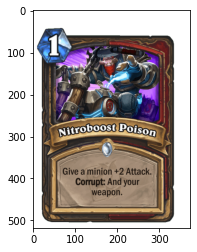

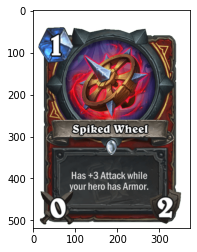

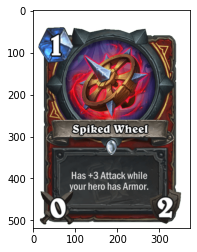

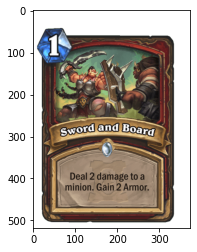

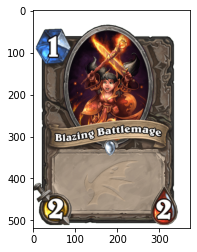

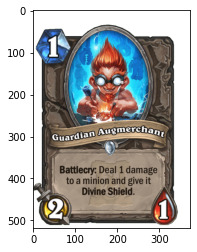

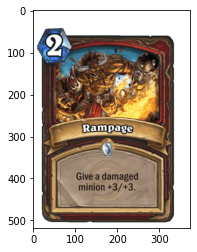

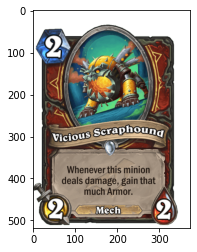

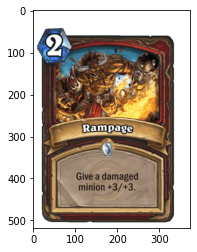

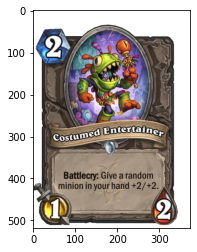

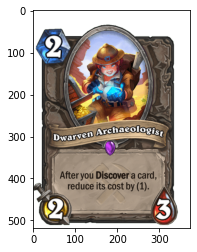

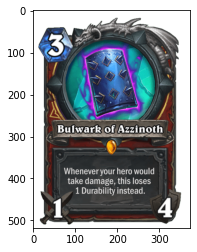

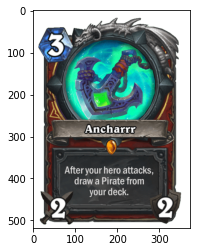

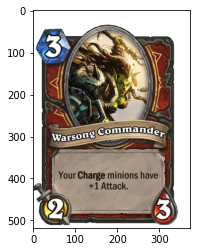

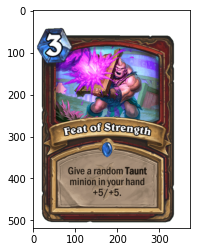

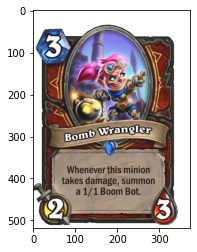

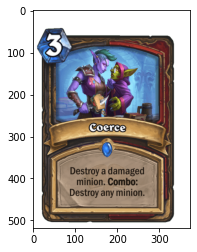

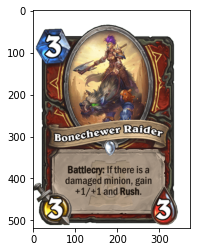

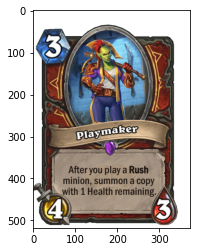

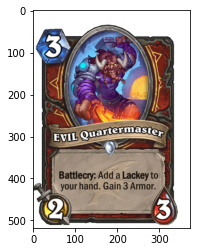

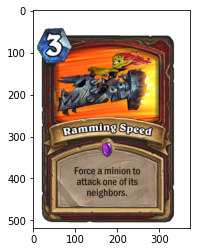

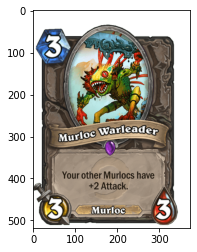

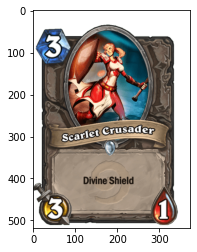

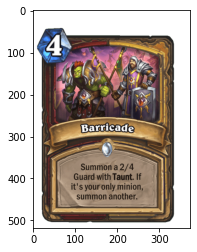

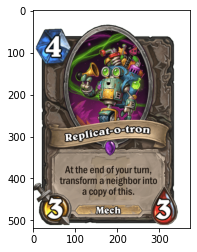

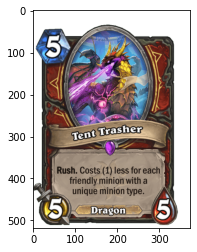

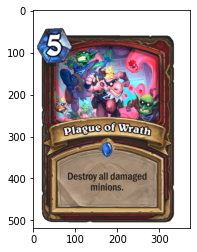

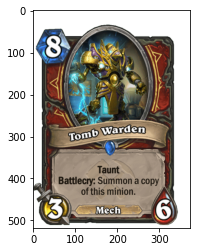

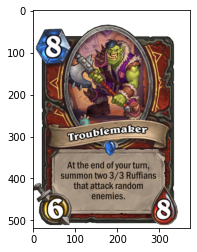

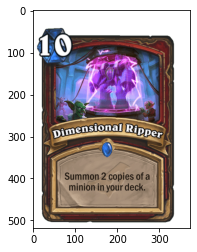

In [22]:
from PIL import Image
import requests
from io import BytesIO

show_decks = [int(a) for a in final_decks[1]]
readable = vector_to_deck(show_decks, new_cards)
readable = groupby_cost(readable)

print("Neutral Card % in new_cards: ", (len(sort_by_class('Neutral',new_cards))/len(new_cards)))
print("Neutral Card % in created_deck: ", (len(sort_by_class('Neutral',readable))/len(readable)))

for card in readable:
    response = requests.get(card['img'])
    img = Image.open(BytesIO(response.content)) 
    plt.figure()
    plt.imshow(img)
    plt.show()

In [23]:
new_cards[181]

#write function to correct card impurities, e.g index 181 that is classed as Neutral even though it's a multiclass Mage/Shaman

{'cardId': 'ULD_184',
 'dbfId': '54259',
 'name': 'Kobold Sandtrooper',
 'cardSet': 'Saviors of Uldum',
 'type': 'Minion',
 'faction': 'Alliance',
 'rarity': 'Common',
 'cost': 2,
 'attack': 2,
 'health': 1,
 'text': '<b>Deathrattle:</b> Deal 3 damage to the enemy_hero.',
 'flavor': 'Stay while, take candle.',
 'artist': 'Christopher Hayes',
 'collectible': True,
 'playerClass': 'Neutral',
 'img': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/18b84657ac167bef1417e68fd65df1e1b92156362d1eec5db551971e7a8ba3e9.png',
 'imgGold': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/a8919cb168b9d5dab6a0e63c09b65ea938829d2545de840ffa3fad7b758a7ae8.png',
 'locale': 'enUS',
 'mechanics': [{'name': 'Deathrattle'}],
 'id': 181}

In [26]:
def convert_to_simulator(deck):
    converted_deck = []
    for card in deck:
        converted_deck.append(card['cardId'])
    return converted_deck


def get_real_sample(class_):
    print("Sampling a",class_, "deck from dataset")
    deck_list = read_json_decks('data_'+class_+'.json')
    d = random.sample(deck_list,1)
    d = convert_to_simulator(d[0])
    return d

enemy_deck = get_real_sample(random.choice(classes))
print(enemy_deck)


#fireplace_deck = convert_to_simulator(readable)
print(fireplace_deck)

Sampling a Mage deck from dataset
['BT_021', 'DAL_608', 'DAL_608', 'ULD_433', 'DAL_577', 'DAL_577', 'ULD_726', 'ULD_726', 'BT_028', 'BT_006', 'DAL_575', 'DAL_603', 'DAL_603', 'EX1_608', 'EX1_608', 'CS2_023', 'CS2_023', 'DRG_104', 'ULD_239', 'ULD_239', 'EX1_289', 'EX1_289', 'DAL_177', 'DAL_177', 'DRG_109', 'DRG_109', 'YOD_030', 'YOD_030', 'ULD_157', 'ULD_157']
['YOP_015', 'YOP_013', 'YOP_013', 'BT_233', 'DRG_239', 'BT_722', 'CS2_104', 'DAL_759', 'CS2_104', 'DMF_189', 'ULD_309', 'BT_781', 'DRG_025', 'EX1_084', 'DMF_530', 'YOD_024', 'SCH_521', 'BT_140', 'SCH_317', 'DRG_020', 'DRG_022', 'EX1_507', 'EX1_020', 'YOP_005', 'BT_190', 'DMF_528', 'ULD_707', 'ULD_253', 'SCH_337', 'DAL_059']


In [96]:
import simulator
importlib.reload(simulator)

os.chdir('/home/hart/Documents/RGUProjects/Honours/')


simulator.run_sim("fireplace/tests/full_game.py", [1, fireplace_deck, "Jamie", fireplace_deck])


/home/hart/Documents/RGUProjects/Honours
Jamie PlayState.WON

['Jamie PlayState.WON']


['Jamie PlayState.WON']

In [8]:

os.chdir('/home/hart/Documents/RGUProjects/Honours/')


In [32]:
#can't get it to run on separate file so I will leave it here
#need to change functions to accomodate opponents class and concat everything into a 
import os
import sys
import importlib

importlib.reload(os)

fireplace_deck = ['YOP_015', 'YOP_013', 'YOP_013', 'BT_233', 'DRG_239', 'BT_722', 'CS2_104', 'DAL_759', 'CS2_104', 'DMF_189', 'ULD_309', 'BT_781', 'DRG_025', 'EX1_084', 'DMF_530', 'YOD_024', 'SCH_521', 'BT_140', 'SCH_317', 'DRG_020', 'DRG_022', 'EX1_507', 'EX1_020', 'YOP_005', 'BT_190', 'DMF_528', 'ULD_707', 'ULD_253', 'SCH_337', 'DAL_059']


print(os.getcwd())
curr_dir = os.getcwd()
new_dir = curr_dir+'/fireplace/tests'


os.chdir(new_dir)
#os.chdir('/home/hart/Documents/RGUProjects/Honours/fireplace/tests')

import full_game
import utils_fireplace


importlib.reload(full_game)
importlib.reload(utils_fireplace)


def run_sim(file, args, num):
    results = []
    for i in range(num):
        script_descriptor = open(file)
        a_script = script_descriptor.read()
        sys.argv = args
        exec(a_script)
        result = open("results.txt", 'r')
        line = result.readline()
        print(line)
        line = line.strip('\n')
        results.append(line)
    print(results)
    return results

#use if breaks
#script_descriptor = open("full_game.py")
#a_script = script_descriptor.read()
#sys.argv = [1, fireplace_deck, "Jamie", enemy_deck]
#exec(a_script)

#full_game.test_full_game(fireplace_deck)

results = run_sim("full_game.py", [1, fireplace_deck, "Jamie", enemy_deck], 5)
os.chdir(curr_dir)
#os.chdir('/home/hart/Documents/RGUProjects/Honours/')


[fireplace.__init__]: Initializing card database


/home/hart/Documents/RGUProjects/Honours


[fireplace.__init__]: Merged 10933 cards
[fireplace.entity]: Setting up game Game(players=(Player(name='Jamie', hero=None), Player(name='Oppenent', hero=None)))
[fireplace.entity]: Tossing the coin... Jamie wins!
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>) triggering <TargetedAction: Summon(<Summon.CARD>=<HeroPower ('Armor Up!')>)> targeting [Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>)]
[fireplace.actions]: Jamie summons [<HeroPower ('Armor Up!')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>) triggering <TargetedAction: Summon(<Summon.CARD>=<Hero ('Garrosh Hellscream')>)> targeting [Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>)]
[fireplace.actions]: Jamie summons [<Hero ('Garrosh Hellscream')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Player(name='Jamie', hero=<Hero ('Garrosh

[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Jamie ends turn 5
[fireplace.entity]: Oppenent begins turn 6
[fireplace.entity]: Oppenent is now at 3 mana crystals
[fireplace.actions]: Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>) triggering <TargetedAction: Draw()> targeting [Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>)]
[fireplace.entity]: Oppenent draws <Spell ('Font of Power')>
[fireplace.card]: <Spell ('Font of Power')> moves from <Zone.DECK: 2> to <Zone.HAND: 3>
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Oppenent uses hero power <HeroPower ('Fireblast')> on <Hero ('Garrosh Hellscream')>
[fireplace.entity]: Oppenent pays 2 mana
[fireplace.actions]: <HeroPower ('Fireblast')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=1)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <HeroPower

[fireplace.actions]: Activating <Weapon ('Bulwark of Azzinoth')> action targeting None
[fireplace.entity]: Empty stack, refreshing auras and processing deaths


['YOP_015', 'YOP_013', 'YOP_013', 'BT_233', 'DRG_239', 'BT_722', 'CS2_104', 'DAL_759', 'CS2_104', 'DMF_189', 'ULD_309', 'BT_781', 'DRG_025', 'EX1_084', 'DMF_530', 'YOD_024', 'SCH_521', 'BT_140', 'SCH_317', 'DRG_020', 'DRG_022', 'EX1_507', 'EX1_020', 'YOP_005', 'BT_190', 'DMF_528', 'ULD_707', 'ULD_253', 'SCH_337', 'DAL_059']
Can mulligan [<Weapon ('Ancharrr')>, <Weapon ('Bulwark of Azzinoth')>, <Spell ('Rampage')>]
Can mulligan [<Minion ('Chenvaala')>, <Secret ('Flame Ward')>, <Minion ('Mana Cyclone')>, <Minion ('Questing Explorer')>]
Playing <Spell ('The Coin')> on None
Playing <Minion ('Mana Cyclone')> on None
Playing <Spell ('Nitroboost Poison')> on None
Playing <Spell ('Ray of Frost')> on None
Playing <Weapon ('Ancharrr')> on None
Playing <Minion ('Chenvaala')> on None
Playing <Weapon ('Bulwark of Azzinoth')> on None


[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: <Hero ('Garrosh Hellscream')> attacks <Minion ('Chenvaala')>
[fireplace.actions]: <Hero ('Garrosh Hellscream')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=1)> targeting [<Minion ('Chenvaala')>]
[fireplace.actions]: <Hero ('Garrosh Hellscream')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=1)> targeting [<Minion ('Chenvaala')>]
[fireplace.actions]: <Hero ('Garrosh Hellscream')> triggering <TargetedAction: Damage()> targeting [<Minion ('Chenvaala')>]
[fireplace.actions]: <Minion ('Chenvaala')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=2)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Chenvaala')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=2)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Chenvaala')> triggering <TargetedAction: Damage()> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Weapon ('Bul

[fireplace.actions]: <Minion ('Chenvaala')> triggering <TargetedAction: Damage()> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.entity]: <Hero ('Garrosh Hellscream')> loses 2 armor instead of damage
[fireplace.actions]: <Weapon ('Bulwark of Azzinoth')> triggers off <Action: Attack(<Attack.ATTACKER>=<Hero ('Garrosh Hellscream')>, <Attack.DEFENDER>=<Minion ('Chenvaala')>)> from <Hero ('Garrosh Hellscream')>
[fireplace.actions]: <Weapon ('Bulwark of Azzinoth')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=1)> targeting [<Weapon ('Bulwark of Azzinoth')>]
[fireplace.actions]: <Weapon ('Bulwark of Azzinoth')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=1)> targeting [<Weapon ('Bulwark of Azzinoth')>]
[fireplace.actions]: <Weapon ('Bulwark of Azzinoth')> triggering <TargetedAction: Damage()> targeting [<Weapon ('Bulwark of Azzinoth')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Jamie ends turn 11
[fireplace.entity]: Oppenent

Playing <Secret ('Flame Ward')> on None
Playing <Spell ('Font of Power')> on None
Choosing card <Minion ('Curio Collector')>
Playing <Spell ('Rampage')> on <Minion ('Chenvaala')>
Playing <Spell ('Ancient Mysteries')> on None
Playing <Spell ("Conjurer's Calling")> on None


[fireplace.actions]: <Minion ('Mana Cyclone')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=2)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Mana Cyclone')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=2)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Mana Cyclone')> triggering <TargetedAction: Damage()> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: <Minion ('Chenvaala')> attacks <Hero ('Garrosh Hellscream')>
[fireplace.actions]: <Minion ('Chenvaala')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=5)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Chenvaala')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=5)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Chenvaala')> triggering <TargetedAction: Damage()> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.entity]: Empty

[fireplace.actions]: <Hero ('Garrosh Hellscream')> triggering <TargetedAction: Damage()> targeting [<Minion ('Curio Collector')>]
[fireplace.actions]: <Minion ('Curio Collector')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=4)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Curio Collector')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=4)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Curio Collector')> triggering <TargetedAction: Damage()> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Weapon ('Bulwark of Azzinoth')> triggers off <Action: Attack(<Attack.ATTACKER>=<Hero ('Garrosh Hellscream')>, <Attack.DEFENDER>=<Minion ('Curio Collector')>)> from <Hero ('Garrosh Hellscream')>
[fireplace.actions]: <Weapon ('Bulwark of Azzinoth')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=1)> targeting [<Weapon ('Bulwark of Azzinoth')>]
[fireplace.actions]: <Weapon ('Bulwark of Azzinoth')> triggering <TargetedAction: 

Playing <Minion ('Bonechewer Raider')> on None
Playing <Minion ('Licensed Adventurer')> on None
Playing <Minion ('Curio Collector')> on None
Playing <Minion ('Tent Trasher')> on None
Game End
Jamie Garrosh Hellscream PlayState.LOST
Game completed normally.
PlayState.LOST



[fireplace.__init__]: Merged 10933 cards
[fireplace.entity]: Setting up game Game(players=(Player(name='Jamie', hero=None), Player(name='Oppenent', hero=None)))
[fireplace.entity]: Tossing the coin... Jamie wins!
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>) triggering <TargetedAction: Summon(<Summon.CARD>=<HeroPower ('Armor Up!')>)> targeting [Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>)]
[fireplace.actions]: Jamie summons [<HeroPower ('Armor Up!')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>) triggering <TargetedAction: Summon(<Summon.CARD>=<Hero ('Garrosh Hellscream')>)> targeting [Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>)]
[fireplace.actions]: Jamie summons [<Hero ('Garrosh Hellscream')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Player(name='Jamie', hero=<Hero ('Garrosh

[fireplace.actions]: Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>) triggering <TargetedAction: Draw()> targeting [Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>)]
[fireplace.entity]: Oppenent draws <Secret ('Flame Ward')>
[fireplace.card]: <Secret ('Flame Ward')> moves from <Zone.DECK: 2> to <Zone.HAND: 3>
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Oppenent plays <Spell ('Evocation')> (target=None, index=None)
[fireplace.entity]: Oppenent pays 2 mana
[fireplace.card]: <Spell ('Evocation')> moves from <Zone.HAND: 3> to <Zone.PLAY: 1>
[fireplace.actions]: <Spell ('Evocation')> triggering <TargetedAction: Battlecry(<Battlecry.TARGET>=None)> targeting [<Spell ('Evocation')>]
[fireplace.actions]: Activating <Spell ('Evocation')> action targeting None
[fireplace.actions]: <Spell ('Evocation')> triggering <TargetedAction: Give(<Give.CARD>=RandomCardPicker({'collectible': True, 'type': <CardType.SPELL: 5>, 'card_class': <C

['YOP_015', 'YOP_013', 'YOP_013', 'BT_233', 'DRG_239', 'BT_722', 'CS2_104', 'DAL_759', 'CS2_104', 'DMF_189', 'ULD_309', 'BT_781', 'DRG_025', 'EX1_084', 'DMF_530', 'YOD_024', 'SCH_521', 'BT_140', 'SCH_317', 'DRG_020', 'DRG_022', 'EX1_507', 'EX1_020', 'YOP_005', 'BT_190', 'DMF_528', 'ULD_707', 'ULD_253', 'SCH_337', 'DAL_059']
Can mulligan [<Spell ('Plague of Wrath')>, <Weapon ('Bulwark of Azzinoth')>, <Minion ('Scarlet Crusader')>]
Can mulligan [<Spell ('Raid the Sky Temple')>, <Minion ("Sorcerer's Apprentice")>, <Minion ('Khadgar')>, <Spell ("Conjurer's Calling")>]
Playing <Spell ('Ancient Mysteries')> on None
Playing <Minion ('Scarlet Crusader')> on None
Playing <Spell ('Evocation')> on None


[fireplace.actions]: Giving [<Secret ('Duplicate')>] to Oppenent
[fireplace.card]: <Secret ('Duplicate')> moves from <Zone.SETASIDE: 6> to <Zone.HAND: 3>
[fireplace.actions]: <TargetedAction: Give(<Give.CARD>=RandomCardPicker({'collectible': True, 'type': <CardType.SPELL: 5>, 'card_class': <CardClass.MAGE: 4>}))> queues up callback <TargetedAction: Buff(<Buff.BUFF>='BT_006e')>
[fireplace.actions]: <Spell ('Evocation')> triggering <TargetedAction: Buff(<Buff.BUFF>='BT_006e')> targeting [<Secret ('Duplicate')>]
[fireplace.entity]: Applying <Enchantment ('Evocation')> to <Secret ('Duplicate')>
[fireplace.card]: <Enchantment ('Evocation')> moves from <Zone.SETASIDE: 6> to <Zone.PLAY: 1>
[fireplace.actions]: <Spell ('Evocation')> triggering <TargetedAction: Give(<Give.CARD>=RandomCardPicker({'collectible': True, 'type': <CardType.SPELL: 5>, 'card_class': <CardClass.MAGE: 4>}))> targeting [Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>)]
[fireplace.actions]: Giving [<Spell ('Firela

[fireplace.actions]: <Enchantment ('Evocation')> triggering <TargetedAction: Discard()> targeting [<Secret ('Frozen Clone')>]
[fireplace.entity]: Discarding <Secret ('Frozen Clone')>
[fireplace.card]: <Secret ('Frozen Clone')> moves from <Zone.HAND: 3> to <Zone.GRAVEYARD: 4>
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: <Enchantment ('Evocation')> triggers off <Action: EndTurn(<EndTurn.PLAYER>=Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>))> from Game(players=(Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>), Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>)))
[fireplace.actions]: <Enchantment ('Evocation')> triggering <TargetedAction: Discard()> targeting [<Spell ('Ancient Mysteries')>]
[fireplace.entity]: Discarding <Spell ('Ancient Mysteries')>
[fireplace.card]: <Spell ('Ancient Mysteries')> moves from <Zone.HAND: 3> to <Zone.GRAVEYARD: 4>
[fireplace.entity]: Empty stack, refreshing auras and processing deaths

[fireplace.actions]: <Minion ('Scarlet Crusader')> triggering <TargetedAction: Damage()> targeting [<Hero ('Jaina Proudmoore')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Jamie ends turn 9
[fireplace.entity]: Oppenent begins turn 10
[fireplace.entity]: Oppenent is now at 5 mana crystals
[fireplace.actions]: Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>) triggering <TargetedAction: Draw()> targeting [Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>)]
[fireplace.entity]: Oppenent draws <Spell ('Ray of Frost')>
[fireplace.card]: <Spell ('Ray of Frost')> moves from <Zone.DECK: 2> to <Zone.HAND: 3>
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.aura]: Creating <AuraBuff <Minion ("Sorcerer's Apprentice")> -> <Spell ('Ray of Frost')>>
[fireplace.actions]: Oppenent plays <Spell ("Conjurer's Calling")> (target=None, index=None)
[fireplace.entity]: Oppenent pays 3 mana
[fireplace.card]: <Spel

[fireplace.actions]: <Minion ('Warsong Commander')> triggering <TargetedAction: Battlecry(<Battlecry.TARGET>=None)> targeting [<Minion ('Warsong Commander')>]


Playing <Spell ('Ramming Speed')> on None
Playing <Weapon ('Spiked Wheel')> on None
Playing <Minion ("Sorcerer's Apprentice")> on None
Playing <Secret ('Flame Ward')> on None
Playing <Spell ('Coerce')> on None
Playing <Spell ("Conjurer's Calling")> on None
Playing <Minion ('Questing Explorer')> on None
Playing <Spell ('Plague of Wrath')> on None
Playing <Spell ('Ray of Frost')> on None
Playing <Minion ('Warsong Commander')> on None


[fireplace.actions]: Activating <Minion ('Warsong Commander')> action targeting None
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Jamie plays <Minion ('Costumed Entertainer')> (target=None, index=None)
[fireplace.entity]: Jamie pays 2 mana
[fireplace.card]: <Minion ('Costumed Entertainer')> moves from <Zone.HAND: 3> to <Zone.PLAY: 1>
[fireplace.actions]: <Minion ('Costumed Entertainer')> triggering <TargetedAction: Battlecry(<Battlecry.TARGET>=None)> targeting [<Minion ('Costumed Entertainer')>]
[fireplace.actions]: Activating <Minion ('Costumed Entertainer')> action targeting None
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: <Minion ('Scarlet Crusader')> attacks <Minion ('Questing Explorer')>
[fireplace.actions]: <Minion ('Scarlet Crusader')> trigge

[fireplace.entity]: Oppenent begins turn 16
[fireplace.entity]: Oppenent is now at 8 mana crystals
[fireplace.actions]: Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>) triggering <TargetedAction: Draw()> targeting [Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>)]
[fireplace.entity]: Oppenent draws <Spell ('Arcane Intellect')>
[fireplace.card]: <Spell ('Arcane Intellect')> moves from <Zone.DECK: 2> to <Zone.HAND: 3>
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Oppenent plays <Spell ('The Coin')> (target=None, index=None)
[fireplace.entity]: Oppenent pays 0 mana
[fireplace.card]: <Spell ('The Coin')> moves from <Zone.HAND: 3> to <Zone.PLAY: 1>
[fireplace.actions]: <Spell ('The Coin')> triggering <TargetedAction: Battlecry(<Battlecry.TARGET>=None)> targeting [<Spell ('The Coin')>]
[fireplace.actions]: Activating <Spell ('The Coin')> action targeting None
[fireplace.actions]: <Spell ('The Coin')> triggering <TargetedAction

Playing <Minion ('Costumed Entertainer')> on None
Playing <Spell ('Raid the Sky Temple')> on None
Playing <Minion ('Chenvaala')> on None
Playing <Minion ('Mana Cyclone')> on None
Playing <Spell ('The Coin')> on None
Playing <Spell ('Arcane Intellect')> on None
Playing <Minion ('Murloc Warleader')> on None


[fireplace.actions]: <HeroPower ('Fireblast')> triggering <TargetedAction: Damage()> targeting [<Hero ('Jaina Proudmoore')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Oppenent plays <Spell ('Font of Power')> (target=None, index=None)
[fireplace.entity]: Oppenent pays 1 mana
[fireplace.card]: <Spell ('Font of Power')> moves from <Zone.HAND: 3> to <Zone.PLAY: 1>
[fireplace.actions]: <Spell ('Font of Power')> triggering <TargetedAction: Battlecry(<Battlecry.TARGET>=None)> targeting [<Spell ('Font of Power')>]
[fireplace.actions]: Activating <Spell ('Font of Power')> action targeting None
[fireplace.actions]: <Spell ('Font of Power')> triggering <TargetedAction: Discover(<Discover.CARDS>=RandomCardPicker({'collectible': True, 'type': <CardType.MINION: 4>, 'card_class': <CardClass.MAGE: 4>}))> targeting [Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>)]
[firepl

[fireplace.actions]: <Minion ('Game Master')> attacks <Minion ('Bonechewer Raider')>
[fireplace.actions]: <Minion ('Game Master')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=2)> targeting [<Minion ('Bonechewer Raider')>]
[fireplace.actions]: <Minion ('Game Master')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=2)> targeting [<Minion ('Bonechewer Raider')>]
[fireplace.actions]: <Minion ('Game Master')> triggering <TargetedAction: Damage()> targeting [<Minion ('Bonechewer Raider')>]
[fireplace.actions]: <Minion ('Bonechewer Raider')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=3)> targeting [<Minion ('Game Master')>]
[fireplace.actions]: <Minion ('Bonechewer Raider')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=3)> targeting [<Minion ('Game Master')>]
[fireplace.actions]: <Minion ('Bonechewer Raider')> triggering <TargetedAction: Damage()> targeting [<Minion ('Game Master')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.en

Playing <Spell ('Font of Power')> on None
Choosing card <Minion ('Game Master')>
Playing <Minion ("Sorcerer's Apprentice")> on None
Playing <Minion ('Game Master')> on None
Playing <Minion ('Bonechewer Raider')> on None
Playing <Minion ('Astromancer Solarian')> on None
Playing <Minion ('Tomb Warden')> on None


[fireplace.actions]: Activating <Minion ('Tomb Warden')> action targeting None
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Jamie plays <Minion ('Guardian Augmerchant')> (target=None, index=None)
[fireplace.entity]: Jamie pays 1 mana
[fireplace.card]: <Minion ('Guardian Augmerchant')> moves from <Zone.HAND: 3> to <Zone.PLAY: 1>
[fireplace.actions]: <Minion ('Guardian Augmerchant')> triggering <TargetedAction: Battlecry(<Battlecry.TARGET>=None)> targeting [<Minion ('Guardian Augmerchant')>]
[fireplace.actions]: Activating <Minion ('Guardian Augmerchant')> action targeting None
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: <Minion ('Murloc Warleader')> attacks <Hero ('Jaina Proudmoore')>
[fireplace.actions]: <Minion ('Murloc Warleader')> triggering <Tar

[fireplace.entity]: Jamie draws <Spell ('Feat of Strength')>
[fireplace.card]: <Spell ('Feat of Strength')> moves from <Zone.DECK: 2> to <Zone.HAND: 3>
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Jamie plays <Spell ('Feat of Strength')> (target=None, index=None)
[fireplace.entity]: Jamie pays 3 mana
[fireplace.card]: <Spell ('Feat of Strength')> moves from <Zone.HAND: 3> to <Zone.PLAY: 1>
[fireplace.actions]: <Spell ('Feat of Strength')> triggering <TargetedAction: Battlecry(<Battlecry.TARGET>=None)> targeting [<Spell ('Feat of Strength')>]
[fireplace.actions]: Activating <Spell ('Feat of Strength')> action targeting None
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: <Minion ('Murloc Warleader')> attacks <Hero ('Jaina Proudmoore')>
[fireplace.actions]: <Secret ('Ice Barrier')> triggers off <Action: Attack(<Attack.ATTACKE

Playing <Minion ('Guardian Augmerchant')> on None
Playing <Secret ('Ice Barrier')> on None
Playing <Spell ('Feat of Strength')> on None
Playing <Spell ("Conjurer's Calling")> on None
Playing <Minion ('Questing Explorer')> on None
Playing <Minion ('Bomb Wrangler')> on None


[fireplace.actions]: <Minion ('Tomb Warden')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=3)> targeting [<Hero ('Jaina Proudmoore')>]
[fireplace.actions]: <Minion ('Tomb Warden')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=3)> targeting [<Hero ('Jaina Proudmoore')>]
[fireplace.actions]: <Minion ('Tomb Warden')> triggering <TargetedAction: Damage()> targeting [<Hero ('Jaina Proudmoore')>]
[fireplace.entity]: <Hero ('Jaina Proudmoore')> loses 2 armor instead of damage
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Jamie ends turn 25
[fireplace.entity]: Oppenent begins turn 26
[fireplace.entity]: Oppenent is now at 10 mana crystals
[fireplace.actions]: Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>) triggering <TargetedAction: Draw()> targeting [Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>)]
[fireplace.entity]: Oppenent draws <Spell ('Ancient Mysteries')>
[fireplace.card]: <Spell ('Ancient Mysteries')> moves

[fireplace.entity]: Oppenent draws <Minion ('Mana Cyclone')>
[fireplace.card]: <Minion ('Mana Cyclone')> moves from <Zone.DECK: 2> to <Zone.HAND: 3>
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Oppenent plays <Spell ('Ancient Mysteries')> (target=None, index=None)
[fireplace.entity]: Oppenent pays 2 mana
[fireplace.card]: <Spell ('Ancient Mysteries')> moves from <Zone.HAND: 3> to <Zone.PLAY: 1>
[fireplace.actions]: <Spell ('Ancient Mysteries')> triggering <TargetedAction: Battlecry(<Battlecry.TARGET>=None)> targeting [<Spell ('Ancient Mysteries')>]
[fireplace.actions]: Activating <Spell ('Ancient Mysteries')> action targeting None
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Oppenent plays <Minion ('Mana Cyclone')> (target=None, index=None)
[fireplace.entity]: Oppenent pays 2 mana
[fireplace.card]: <Minion ('Mana Cyclone

Playing <Spell ('Sword and Board')> on None
Playing <Spell ('Nitroboost Poison')> on None
Playing <Spell ('Arcane Intellect')> on None
Playing <Minion ('Blazing Battlemage')> on None
Playing <Spell ('Ancient Mysteries')> on None
Playing <Minion ('Mana Cyclone')> on None
Game End
Jamie Garrosh Hellscream PlayState.WON
Game completed normally.
PlayState.WON



[fireplace.__init__]: Merged 10933 cards
[fireplace.entity]: Setting up game Game(players=(Player(name='Jamie', hero=None), Player(name='Oppenent', hero=None)))
[fireplace.entity]: Tossing the coin... Oppenent wins!
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>) triggering <TargetedAction: Summon(<Summon.CARD>=<HeroPower ('Armor Up!')>)> targeting [Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>)]
[fireplace.actions]: Jamie summons [<HeroPower ('Armor Up!')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>) triggering <TargetedAction: Summon(<Summon.CARD>=<Hero ('Garrosh Hellscream')>)> targeting [Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>)]
[fireplace.actions]: Jamie summons [<Hero ('Garrosh Hellscream')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Player(name='Jamie', hero=<Hero ('Garr

[fireplace.entity]: Oppenent ends turn 3
[fireplace.entity]: Jamie begins turn 4
[fireplace.entity]: Jamie is now at 2 mana crystals
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>) triggering <TargetedAction: Draw()> targeting [Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>)]
[fireplace.entity]: Jamie draws <Spell ('Nitroboost Poison')>
[fireplace.card]: <Spell ('Nitroboost Poison')> moves from <Zone.DECK: 2> to <Zone.HAND: 3>
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: <Minion ('Guardian Augmerchant')> attacks <Minion ('Questing Explorer')>
[fireplace.actions]: <Minion ('Guardian Augmerchant')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=2)> targeting [<Minion ('Questing Explorer')>]
[fireplace.actions]: <Minion ('Guardian Augmerchant')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=2)> targeting [<Minion ('Questing Explorer')>]
[fireplace.actions]: <Minion ('Guardian Augmerchant')> tri

['YOP_015', 'YOP_013', 'YOP_013', 'BT_233', 'DRG_239', 'BT_722', 'CS2_104', 'DAL_759', 'CS2_104', 'DMF_189', 'ULD_309', 'BT_781', 'DRG_025', 'EX1_084', 'DMF_530', 'YOD_024', 'SCH_521', 'BT_140', 'SCH_317', 'DRG_020', 'DRG_022', 'EX1_507', 'EX1_020', 'YOP_005', 'BT_190', 'DMF_528', 'ULD_707', 'ULD_253', 'SCH_337', 'DAL_059']
Can mulligan [<Minion ('Guardian Augmerchant')>, <Spell ('Sword and Board')>, <Spell ('Coerce')>, <Minion ('Playmaker')>]
Can mulligan [<Minion ('Mana Giant')>, <Spell ("Conjurer's Calling")>, <Spell ('Ancient Mysteries')>]
Playing <Minion ('Guardian Augmerchant')> on None
Playing <Spell ('The Coin')> on None
Playing <Minion ('Questing Explorer')> on None
Playing <Minion ('Licensed Adventurer')> on None
Playing <Spell ('Sword and Board')> on None


[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Oppenent plays <Spell ('Font of Power')> (target=None, index=None)
[fireplace.entity]: Oppenent pays 1 mana
[fireplace.card]: <Spell ('Font of Power')> moves from <Zone.HAND: 3> to <Zone.PLAY: 1>
[fireplace.actions]: <Spell ('Font of Power')> triggering <TargetedAction: Battlecry(<Battlecry.TARGET>=None)> targeting [<Spell ('Font of Power')>]
[fireplace.actions]: Activating <Spell ('Font of Power')> action targeting None
[fireplace.actions]: <Spell ('Font of Power')> triggering <TargetedAction: Discover(<Discover.CARDS>=RandomCardPicker({'collectible': True, 'type': <CardType.MINION: 4>, 'card_class': <CardClass.MAGE: 4>}))> targeting [Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>)]
[fireplace.actions]: <Spell ('Font of Power')> discovers [<Minion ('Animated Avalanche')>, <Minion ('Animated Armor')>, <Minion ('Ethereal Conjurer')>] for Oppenent
[fireplace.actions]: Player(name='Oppen

[fireplace.actions]: Activating <Minion ('Vicious Scraphound')> action targeting None
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: <Hero ('Garrosh Hellscream')> attacks <Minion ('Questing Explorer')>
[fireplace.actions]: <Hero ('Garrosh Hellscream')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=1)> targeting [<Minion ('Questing Explorer')>]
[fireplace.actions]: <Hero ('Garrosh Hellscream')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=1)> targeting [<Minion ('Questing Explorer')>]
[fireplace.actions]: <Hero ('Garrosh Hellscream')> triggering <TargetedAction: Damage()> targeting [<Minion ('Questing Explorer')>]
[fireplace.actions]: <Minion ('Questing Explorer')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=2)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Questing Explorer')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT

Playing <Spell ('Font of Power')> on None
Choosing card <Minion ('Animated Armor')>
Playing <Spell ('Rampage')> on <Minion ('Licensed Adventurer')>
Playing <Secret ('Ice Barrier')> on None
Playing <Weapon ('Bulwark of Azzinoth')> on None
Playing <Minion ('Vicious Scraphound')> on None


[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: <Minion ('Vicious Scraphound')> is removed from the field
[fireplace.card]: <Minion ('Vicious Scraphound')> moves from <Zone.PLAY: 1> to <Zone.GRAVEYARD: 4>
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Processing Death for <Minion ('Vicious Scraphound')>
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Oppenent ends turn 11
[fireplace.entity]: Jamie begins turn 12
[fireplace.entity]: Jamie is now at 6 mana crystals
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>) triggering <TargetedAction: Draw()> targeting [Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>)]
[fireplace.entity]: Jamie draws <Spell ('Feat of Strength')>
[fireplace.card]: <Spell ('Feat of Strength')> moves from <Zone.DECK: 2> to <Zone.HAND: 3>
[fireplace.entity]: Empty stack, refreshing auras and processin

[fireplace.actions]: <Minion ('Licensed Adventurer')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=6)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Licensed Adventurer')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=6)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Licensed Adventurer')> triggering <TargetedAction: Damage()> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Weapon ('Bulwark of Azzinoth')> triggers off <Action: Attack(<Attack.ATTACKER>=<Hero ('Garrosh Hellscream')>, <Attack.DEFENDER>=<Minion ('Licensed Adventurer')>)> from <Hero ('Garrosh Hellscream')>
[fireplace.actions]: <Weapon ('Bulwark of Azzinoth')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=1)> targeting [<Weapon ('Bulwark of Azzinoth')>]
[fireplace.actions]: <Weapon ('Bulwark of Azzinoth')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=1)> targeting [<Weapon ('Bulwark of Azzinoth')>]
[fireplace.actions]: <Weapon ('Bulwa

Playing <Minion ('Playmaker')> on None
Playing <Spell ('Feat of Strength')> on None
Playing <Spell ('Raid the Sky Temple')> on None
Playing <Spell ("Conjurer's Calling")> on None
Playing <Spell ('Nitroboost Poison')> on None
Playing <Minion ('Mana Giant')> on None
Game End
Jamie Garrosh Hellscream PlayState.LOST
Game completed normally.
PlayState.LOST



[fireplace.__init__]: Merged 10933 cards
[fireplace.entity]: Setting up game Game(players=(Player(name='Jamie', hero=None), Player(name='Oppenent', hero=None)))
[fireplace.entity]: Tossing the coin... Jamie wins!
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>) triggering <TargetedAction: Summon(<Summon.CARD>=<HeroPower ('Armor Up!')>)> targeting [Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>)]
[fireplace.actions]: Jamie summons [<HeroPower ('Armor Up!')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>) triggering <TargetedAction: Summon(<Summon.CARD>=<Hero ('Garrosh Hellscream')>)> targeting [Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>)]
[fireplace.actions]: Jamie summons [<Hero ('Garrosh Hellscream')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Player(name='Jamie', hero=<Hero ('Garrosh

[fireplace.entity]: Oppenent draws <Spell ('Magic Trick')>
[fireplace.card]: <Spell ('Magic Trick')> moves from <Zone.DECK: 2> to <Zone.HAND: 3>
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Oppenent plays <Minion ('Mana Cyclone')> (target=None, index=None)
[fireplace.entity]: Oppenent pays 2 mana
[fireplace.card]: <Minion ('Mana Cyclone')> moves from <Zone.HAND: 3> to <Zone.PLAY: 1>
[fireplace.actions]: <Minion ('Mana Cyclone')> triggering <TargetedAction: Battlecry(<Battlecry.TARGET>=None)> targeting [<Minion ('Mana Cyclone')>]
[fireplace.actions]: Activating <Minion ('Mana Cyclone')> action targeting None
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Oppenent ends turn 4
[fireplace.entity]: Jamie begins turn 5
[fireplace.entity]: Jamie is now at 3 mana crystals
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garro

[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: <Minion ('Chenvaala')> attacks <Hero ('Garrosh Hellscream')>
[fireplace.actions]: <Minion ('Chenvaala')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=2)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Chenvaala')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=2)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Chenvaala')> triggering <TargetedAction: Damage()> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.entity]: <Hero ('Garrosh Hellscream')> loses 2 armor instead of damage
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Oppenent ends turn 8
[fireplace.entity]: Jamie begins turn 9
[fireplace.entity]: Jamie is now at 5 mana crystals
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>) triggering <TargetedAction: Draw()> targeting [Player(name='Jamie', hero=<H

['YOP_015', 'YOP_013', 'YOP_013', 'BT_233', 'DRG_239', 'BT_722', 'CS2_104', 'DAL_759', 'CS2_104', 'DMF_189', 'ULD_309', 'BT_781', 'DRG_025', 'EX1_084', 'DMF_530', 'YOD_024', 'SCH_521', 'BT_140', 'SCH_317', 'DRG_020', 'DRG_022', 'EX1_507', 'EX1_020', 'YOP_005', 'BT_190', 'DMF_528', 'ULD_707', 'ULD_253', 'SCH_337', 'DAL_059']
Can mulligan [<Minion ('Dwarven Archaeologist')>, <Minion ('Playmaker')>, <Spell ('Plague of Wrath')>]
Can mulligan [<Spell ('Arcane Intellect')>, <Spell ("Conjurer's Calling")>, <Minion ('Questing Explorer')>, <Spell ('Arcane Intellect')>]
Playing <Spell ('Raid the Sky Temple')> on None
Playing <Spell ('The Coin')> on None
Playing <Minion ('Mana Cyclone')> on None
Playing <Minion ('Playmaker')> on None
Playing <Minion ('Chenvaala')> on None
Playing <Weapon ('Spiked Wheel')> on None
Playing <Spell ("Conjurer's Calling")> on None


[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Jamie plays <Spell ('Plague of Wrath')> (target=None, index=None)
[fireplace.entity]: Jamie pays 5 mana
[fireplace.card]: <Spell ('Plague of Wrath')> moves from <Zone.HAND: 3> to <Zone.PLAY: 1>
[fireplace.actions]: <Spell ('Plague of Wrath')> triggering <TargetedAction: Battlecry(<Battlecry.TARGET>=None)> targeting [<Spell ('Plague of Wrath')>]
[fireplace.actions]: Activating <Spell ('Plague of Wrath')> action targeting None
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Jamie ends turn 9
[fireplace.entity]: Oppenent begins turn 10
[fireplace.entity]: Oppenent is now at 5 mana crystals
[fireplace.actions]: Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>) triggering <TargetedAction: Draw()> targeting [Player(name='Oppenent', hero=<Hero ('Jaina Proudmoore')>)]
[fireplace.e

[fireplace.actions]: <Minion ('Chenvaala')> triggering <TargetedAction: Damage()> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: <Minion ("Sorcerer's Apprentice")> attacks <Hero ('Garrosh Hellscream')>
[fireplace.actions]: <Minion ("Sorcerer's Apprentice")> triggering <TargetedAction: Hit(<Hit.AMOUNT>=3)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ("Sorcerer's Apprentice")> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=3)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ("Sorcerer's Apprentice")> triggering <TargetedAction: Damage()> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Oppenent ends turn 12
[fireplace.entity]: Jamie begins turn 13
[fireplace.entity]: Jamie is now at 7 mana crystals
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garros

Playing <Spell ('Plague of Wrath')> on None
Playing <Spell ('Arcane Intellect')> on None
Playing <Minion ("Sorcerer's Apprentice")> on None
Playing <Spell ('Ray of Frost')> on None
Playing <Spell ('Coerce')> on None
Playing <Spell ('Magic Trick')> on None
Playing <Secret ('Ice Barrier')> on None
Playing <Spell ('Sword and Board')> on None
Playing <Spell ('Font of Power')> on None


[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.aura]: Destroying <AuraBuff <Minion ("Sorcerer's Apprentice")> -> <Spell ('Font of Power')>>
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.card]: <Minion ('Goblin Blastmage')> moves from <Zone.SETASIDE: 6> to <Zone.HAND: 3>
[fireplace.entity]: Discarding <Minion ('Sayge, Seer of Darkmoon')>
[fireplace.card]: <Minion ('Sayge, Seer of Darkmoon')> moves from <Zone.SETASIDE: 6> to <Zone.GRAVEYARD: 4>
[fireplace.entity]: Discarding <Minion ('Starscryer')>
[fireplace.card]: <Minion ('Starscryer')> moves from <Zone.SETASIDE: 6> to <Zone.GRAVEYARD: 4>
[fireplace.actions]: Oppenent plays <Minion ('Goblin Blastmage')> (target=None, index=None)
[fireplace.entity]: Oppenent pays 4 mana
[fireplace.card]: <Minion ('Goblin Blastmage')> moves from <Zone.HAND: 3> to <Zone.PLAY: 1>
[fireplace.actions]: <Minion ('Goblin Blastmage')> triggering <TargetedAction: Battlecry(<Battlecry.TARGE

[fireplace.actions]: Processing Death for <Minion ('Tent Trasher')>
[fireplace.actions]: Processing Death for <Minion ('Chenvaala')>
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: <Minion ('Goblin Blastmage')> attacks <Hero ('Garrosh Hellscream')>
[fireplace.actions]: <Minion ('Goblin Blastmage')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=5)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Goblin Blastmage')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=5)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Goblin Blastmage')> triggering <TargetedAction: Damage()> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Oppenent ends turn 16
[fireplace.entity]: Jamie begins turn 17
[fireplace.entity]: Jamie is now at 9 mana crystals
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garrosh Hellscrea

[fireplace.actions]: <Weapon ('Bulwark of Azzinoth')> triggers off <Action: Attack(<Attack.ATTACKER>=<Hero ('Garrosh Hellscream')>, <Attack.DEFENDER>=<Minion ('Khadgar')>)> from <Hero ('Garrosh Hellscream')>
[fireplace.actions]: <Weapon ('Bulwark of Azzinoth')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=1)> targeting [<Weapon ('Bulwark of Azzinoth')>]
[fireplace.actions]: <Weapon ('Bulwark of Azzinoth')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=1)> targeting [<Weapon ('Bulwark of Azzinoth')>]
[fireplace.actions]: <Weapon ('Bulwark of Azzinoth')> triggering <TargetedAction: Damage()> targeting [<Weapon ('Bulwark of Azzinoth')>]


Choosing card <Minion ('Goblin Blastmage')>
Playing <Minion ('Goblin Blastmage')> on None
Playing <Spell ('Ramming Speed')> on None
Playing <Minion ('Tent Trasher')> on None
Playing <Minion ('Khadgar')> on None
Playing <Minion ('Troublemaker')> on None
Playing <Spell ('Ancient Mysteries')> on None
Playing <Secret ('Flame Ward')> on None
Playing <Weapon ('Bulwark of Azzinoth')> on None


[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: <Minion ('Troublemaker')> attacks <Hero ('Jaina Proudmoore')>
[fireplace.actions]: <Secret ('Ice Barrier')> triggers off <Action: Attack(<Attack.ATTACKER>=<Minion ('Troublemaker')>, <Attack.DEFENDER>=<Hero ('Jaina Proudmoore')>)> from <Minion ('Troublemaker')>
[fireplace.actions]: <Secret ('Ice Barrier')> triggering <TargetedAction: Reveal()> targeting [<Secret ('Ice Barrier')>]
[fireplace.actions]: Revealing secret <Secret ('Ice Barrier')>
[fireplace.card]: <Secret ('Ice Barrier')> moves from <Zone.SECRET: 7> to <Zone.GRAVEYARD: 4>
[fireplace.actions]: <Secret ('Ice Barrier')> triggering <TargetedAction: GainArmor(<GainArmor.AMOUNT>=8)> targeting [<Hero ('Jaina Proudmoore')>]
[fireplace.actions]: <Minion ('Troublemaker')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=6)> targeting [<Hero ('Jaina Proudmoore')>]
[fireplace.actions]: <Minion ('Troublemaker')> triggering <TargetedAction: Predamage(

[fireplace.entity]: Oppenent pays 2 mana
[fireplace.card]: <Minion ('Astromancer Solarian')> moves from <Zone.HAND: 3> to <Zone.PLAY: 1>
[fireplace.actions]: <Minion ('Astromancer Solarian')> triggering <TargetedAction: Battlecry(<Battlecry.TARGET>=None)> targeting [<Minion ('Astromancer Solarian')>]
[fireplace.actions]: Activating <Minion ('Astromancer Solarian')> action targeting None
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: <Minion ('Mana Giant')> attacks <Hero ('Garrosh Hellscream')>
[fireplace.actions]: <Minion ('Mana Giant')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=8)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Mana Giant')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=8)> targeting [<Hero ('Garrosh Hellscream')>]
[fireplace.actions]: <Minion ('Mana Giant')> triggering <TargetedAction: Damage()> targeting [<Hero

Playing <Minion ('Mana Giant')> on None
Playing <Minion ('Dwarven Archaeologist')> on None
Playing <Minion ('Astromancer Solarian')> on None
Playing <Minion ('Tomb Warden')> on None
Game End
Jamie Garrosh Hellscream PlayState.LOST
Game completed normally.
PlayState.LOST



[fireplace.__init__]: Merged 10933 cards
[fireplace.entity]: Setting up game Game(players=(Player(name='Jamie', hero=None), Player(name='Oppenent', hero=None)))
[fireplace.entity]: Tossing the coin... Jamie wins!
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>) triggering <TargetedAction: Summon(<Summon.CARD>=<HeroPower ('Armor Up!')>)> targeting [Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>)]
[fireplace.actions]: Jamie summons [<HeroPower ('Armor Up!')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>) triggering <TargetedAction: Summon(<Summon.CARD>=<Hero ('Garrosh Hellscream')>)> targeting [Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>)]
[fireplace.actions]: Jamie summons [<Hero ('Garrosh Hellscream')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Player(name='Jamie', hero=<Hero ('Garrosh

[fireplace.actions]: Jamie plays <Minion ('Playmaker')> (target=None, index=None)
[fireplace.entity]: Jamie pays 3 mana
[fireplace.card]: <Minion ('Playmaker')> moves from <Zone.HAND: 3> to <Zone.PLAY: 1>
[fireplace.actions]: <Minion ('Playmaker')> triggering <TargetedAction: Battlecry(<Battlecry.TARGET>=None)> targeting [<Minion ('Playmaker')>]
[fireplace.actions]: Activating <Minion ('Playmaker')> action targeting None
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: <Minion ('Vicious Scraphound')> attacks <Hero ('Jaina Proudmoore')>
[fireplace.actions]: <Minion ('Vicious Scraphound')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=2)> targeting [<Hero ('Jaina Proudmoore')>]
[fireplace.actions]: <Minion ('Vicious Scraphound')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=2)> targeting [<Hero ('Jaina Proudmoore')>]
[fireplace.actions]: <Minion ('Vicious Scrapho

['YOP_015', 'YOP_013', 'YOP_013', 'BT_233', 'DRG_239', 'BT_722', 'CS2_104', 'DAL_759', 'CS2_104', 'DMF_189', 'ULD_309', 'BT_781', 'DRG_025', 'EX1_084', 'DMF_530', 'YOD_024', 'SCH_521', 'BT_140', 'SCH_317', 'DRG_020', 'DRG_022', 'EX1_507', 'EX1_020', 'YOP_005', 'BT_190', 'DMF_528', 'ULD_707', 'ULD_253', 'SCH_337', 'DAL_059']
Can mulligan [<Minion ('Replicat-o-tron')>, <Minion ('Playmaker')>, <Weapon ('Spiked Wheel')>]
Can mulligan [<Spell ('Ray of Frost')>, <Minion ('Khadgar')>, <Spell ('Arcane Intellect')>, <Minion ('Mana Giant')>]
Playing <Minion ('Vicious Scraphound')> on None
Playing <Spell ('The Coin')> on None
Playing <Minion ('Playmaker')> on None
Playing <Spell ('Ancient Mysteries')> on None
Playing <Weapon ('Bulwark of Azzinoth')> on None


[fireplace.actions]: <Minion ('Vicious Scraphound')> attacks <Hero ('Jaina Proudmoore')>
[fireplace.actions]: <Minion ('Vicious Scraphound')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=2)> targeting [<Hero ('Jaina Proudmoore')>]
[fireplace.actions]: <Minion ('Vicious Scraphound')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=2)> targeting [<Hero ('Jaina Proudmoore')>]
[fireplace.actions]: <Minion ('Vicious Scraphound')> triggering <TargetedAction: Damage()> targeting [<Hero ('Jaina Proudmoore')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: <Minion ('Playmaker')> attacks <Hero ('Jaina Proudmoore')>
[fireplace.actions]: <Minion ('Playmaker')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=4)> targeting [<Hero ('Jaina Proudmoore')>]
[fireplace.actions]: <Minion ('Playmaker')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=4)> targeting [<Hero ('Jaina Proudmoore')>]
[fireplace.actions]: <Minion ('Playmaker')> triggering

[fireplace.actions]: <Minion ('Khadgar')> attacks <Minion ('Vicious Scraphound')>
[fireplace.actions]: <Minion ('Khadgar')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=2)> targeting [<Minion ('Vicious Scraphound')>]
[fireplace.actions]: <Minion ('Khadgar')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=2)> targeting [<Minion ('Vicious Scraphound')>]
[fireplace.actions]: <Minion ('Khadgar')> triggering <TargetedAction: Damage()> targeting [<Minion ('Vicious Scraphound')>]
[fireplace.actions]: <Minion ('Vicious Scraphound')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=2)> targeting [<Minion ('Khadgar')>]
[fireplace.actions]: <Minion ('Vicious Scraphound')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=2)> targeting [<Minion ('Khadgar')>]
[fireplace.actions]: <Minion ('Vicious Scraphound')> triggering <TargetedAction: Damage()> targeting [<Minion ('Khadgar')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: <Minion ('Vici

[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Oppenent ends turn 12
[fireplace.entity]: Jamie begins turn 13
[fireplace.entity]: Jamie is now at 7 mana crystals
[fireplace.actions]: Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>) triggering <TargetedAction: Draw()> targeting [Player(name='Jamie', hero=<Hero ('Garrosh Hellscream')>)]
[fireplace.entity]: Jamie draws <Minion ('Costumed Entertainer')>
[fireplace.card]: <Minion ('Costumed Entertainer')> moves from <Zone.DECK: 2> to <Zone.HAND: 3>


Playing <Minion ('Khadgar')> on None
Playing <Spell ('Arcane Intellect')> on None
Playing <Minion ('Licensed Adventurer')> on None
Playing <Minion ('Replicat-o-tron')> on None
Playing <Minion ('Mana Cyclone')> on None
Playing <Spell ("Conjurer's Calling")> on None


[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Jamie plays <Spell ('Nitroboost Poison')> (target=None, index=None)
[fireplace.entity]: Jamie pays 1 mana
[fireplace.card]: <Spell ('Nitroboost Poison')> moves from <Zone.HAND: 3> to <Zone.PLAY: 1>
[fireplace.actions]: <Spell ('Nitroboost Poison')> triggering <TargetedAction: Battlecry(<Battlecry.TARGET>=None)> targeting [<Spell ('Nitroboost Poison')>]
[fireplace.actions]: Activating <Spell ('Nitroboost Poison')> action targeting None
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Jamie plays <Minion ('Costumed Entertainer')> (target=None, index=None)
[fireplace.entity]: Jamie pays 2 mana
[fireplace.card]: <Minion ('Costumed Entertainer')> moves from <Zone.HAND: 3> to <Zone.PLAY: 1>
[fireplace.actions]: <Minion ('Costumed Entertainer')> triggering <TargetedAction: Battlecry(<Bat

[fireplace.actions]: <Minion ('Mana Cyclone')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=2)> targeting [<Minion ('Replicat-o-tron')>]
[fireplace.actions]: <Minion ('Mana Cyclone')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=2)> targeting [<Minion ('Replicat-o-tron')>]
[fireplace.actions]: <Minion ('Mana Cyclone')> triggering <TargetedAction: Damage()> targeting [<Minion ('Replicat-o-tron')>]
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: <Minion ('Mana Cyclone')> is removed from the field
[fireplace.card]: <Minion ('Mana Cyclone')> moves from <Zone.PLAY: 1> to <Zone.GRAVEYARD: 4>
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: Processing Death for <Minion ('Mana Cyclone')>
[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.entity]: Jamie ends turn 15
[fireplace.entity]: Oppenent begins turn 16
[fireplace.entity]: Oppenent is now at 8 mana crystals
[

Playing <Spell ('Nitroboost Poison')> on None
Playing <Minion ('Costumed Entertainer')> on None
Playing <Minion ('Licensed Adventurer')> on None
Playing <Spell ("Conjurer's Calling")> on None
Playing <Minion ('Troublemaker')> on None
Playing <Minion ('Questing Explorer')> on None
Playing <Minion ('Questing Explorer')> on None
Playing <Spell ('Rampage')> on <Minion ('Replicat-o-tron')>
Playing <Weapon ('Spiked Wheel')> on None
Playing <Spell ('Plague of Wrath')> on None


[fireplace.entity]: Empty stack, refreshing auras and processing deaths
[fireplace.actions]: <Minion ('Replicat-o-tron')> attacks <Minion ('Licensed Adventurer')>
[fireplace.actions]: <Minion ('Replicat-o-tron')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=6)> targeting [<Minion ('Licensed Adventurer')>]
[fireplace.actions]: <Minion ('Replicat-o-tron')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=6)> targeting [<Minion ('Licensed Adventurer')>]
[fireplace.actions]: <Minion ('Replicat-o-tron')> triggering <TargetedAction: Damage()> targeting [<Minion ('Licensed Adventurer')>]
[fireplace.actions]: <Minion ('Licensed Adventurer')> triggering <TargetedAction: Hit(<Hit.AMOUNT>=3)> targeting [<Minion ('Replicat-o-tron')>]
[fireplace.actions]: <Minion ('Licensed Adventurer')> triggering <TargetedAction: Predamage(<Predamage.AMOUNT>=3)> targeting [<Minion ('Replicat-o-tron')>]
[fireplace.actions]: <Minion ('Licensed Adventurer')> triggering <TargetedAction: Damage()> targeting [<

[fireplace.entity]: Oppenent draws <Minion ('Chenvaala')>
[fireplace.card]: <Minion ('Chenvaala')> moves from <Zone.DECK: 2> to <Zone.HAND: 3>


Playing <Minion ('Mana Giant')> on None
Playing <Spell ('Ray of Frost')> on None
Playing <Minion ('Dwarven Archaeologist')> on None
Game End
Jamie Garrosh Hellscream PlayState.WON
Game completed normally.
PlayState.WON

['PlayState.LOST', 'PlayState.WON', 'PlayState.LOST', 'PlayState.LOST', 'PlayState.WON']
